<a href="https://colab.research.google.com/github/lefreakcestchic1971/coviditaly/blob/master/CovidItaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-white')
root = "/content/drive/My Drive/Colab Notebooks/"
datadir = root + "Dataset/"



Costruiamo e visualizziamo un subset del dataset pubblicato dalla Protezione Civile al seguente [link](https://github.com/pcm-dpc/COVID-19/tree/master/dati-regioni) ed aggiornato quotidianamente

In [3]:
covid = pd.read_csv(datadir + "20200503.csv", sep=",", parse_dates=True)
covid = covid.rename(columns={'data': 'date'})
covid['denominazione_regione'] = covid['denominazione_regione'].str.replace('-',' ')
covid

date stato  codice_regione  ... casi_testati  note_it  note_en
0     2020-02-24T18:00:00   ITA              13  ...          NaN      NaN      NaN
1     2020-02-24T18:00:00   ITA              17  ...          NaN      NaN      NaN
2     2020-02-24T18:00:00   ITA               4  ...          NaN      NaN      NaN
3     2020-02-24T18:00:00   ITA              18  ...          NaN      NaN      NaN
4     2020-02-24T18:00:00   ITA              15  ...          NaN      NaN      NaN
...                   ...   ...             ...  ...          ...      ...      ...
1465  2020-05-03T17:00:00   ITA               9  ...     114354.0      NaN      NaN
1466  2020-05-03T17:00:00   ITA               4  ...      24085.0      NaN      NaN
1467  2020-05-03T17:00:00   ITA              10  ...      26973.0      NaN      NaN
1468  2020-05-03T17:00:00   ITA               2  ...       6046.0      NaN      NaN
1469  2020-05-03T17:00:00   ITA               5  ...     220598.0      NaN      NaN

[1470 rows x 20 columns]

Riorganizziamo il dataframe per esplicitare il numero di positivi e di deceduti per regione e per giorno, nonchè la percentuale di deceduti tra coloro che sono risultati positivi

In [34]:
italy_currently_positive = covid.pivot_table('totale_positivi', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_currently_positive = italy_currently_positive.fillna(method='ffill')
italy_currently_positive = italy_currently_positive.fillna(0)
italy_currently_positive = italy_currently_positive.iloc[:-1] #remove last row (Italia). If i wanted to remove last column I should do iloc[:, :-1]
italy_currently_positive.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_new_positive = covid.pivot_table('nuovi_positivi', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_new_positive = italy_new_positive.fillna(method='ffill')
italy_new_positive = italy_new_positive.fillna(0)
italy_new_positive = italy_new_positive.iloc[:-1] #remove last row (Italia). If i wanted to remove last column I should do iloc[:, :-1]
italy_new_positive.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_dead = covid.pivot_table('deceduti', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_dead = italy_dead.fillna(method='ffill')
italy_dead = italy_dead.fillna(0)
italy_dead = italy_dead.iloc[:-1] 
italy_dead.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_total_positive = covid.pivot_table('totale_casi', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_total_positive = italy_total_positive.fillna(method='ffill')
italy_total_positive = italy_total_positive.fillna(0)
italy_total_positive = italy_total_positive.iloc[:-1] 
italy_total_positive.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_tested = covid.pivot_table('tamponi', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_tested = italy_tested.fillna(method='ffill')
italy_tested = italy_tested.fillna(0)
italy_tested = italy_tested.iloc[:-1] 
italy_tested.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_hospitalized = covid.pivot_table('totale_ospedalizzati', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_hospitalized = italy_hospitalized.fillna(method='ffill')
italy_hospitalized = italy_hospitalized.fillna(0)
italy_hospitalized = italy_hospitalized.iloc[:-1] 
italy_hospitalized.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_recovered = covid.pivot_table('dimessi_guariti', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_recovered = italy_recovered.fillna(method='ffill')
italy_recovered = italy_recovered.fillna(0)
italy_recovered = italy_recovered.iloc[:-1] 
italy_recovered.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_dead_vs_total = italy_dead/italy_total_positive
italy_dead_vs_total = italy_dead_vs_total.fillna(0)
italy_currently_positive

denominazione_regione  Abruzzo  Basilicata  ...  Veneto  Italia
date                                        ...                
2020-02-24T18:00:00          0           0  ...      32     221
2020-02-25T18:00:00          0           0  ...      42     311
2020-02-26T18:00:00          0           0  ...      69     385
2020-02-27T18:00:00          1           0  ...     109     588
2020-02-28T18:00:00          1           0  ...     149     821
...                        ...         ...  ...     ...     ...
2020-04-29T17:00:00       1976         194  ...    8369  104657
2020-04-30T17:00:00       1915         192  ...    8147  101551
2020-05-01T17:00:00       1911         193  ...    7779  100943
2020-05-02T17:00:00       1879         191  ...    7431  100704
2020-05-03T17:00:00       1868         194  ...    7299  100179

[70 rows x 22 columns]

Nella seguente grafica viene rappresentata la dinamica temporale degli attualmente positivi, quindi il totale dei positivi (compresi i nuovo positivi) meno i deceduti ed i guariti, regione per regione, evidenziando i deceduti con un colore più scuro

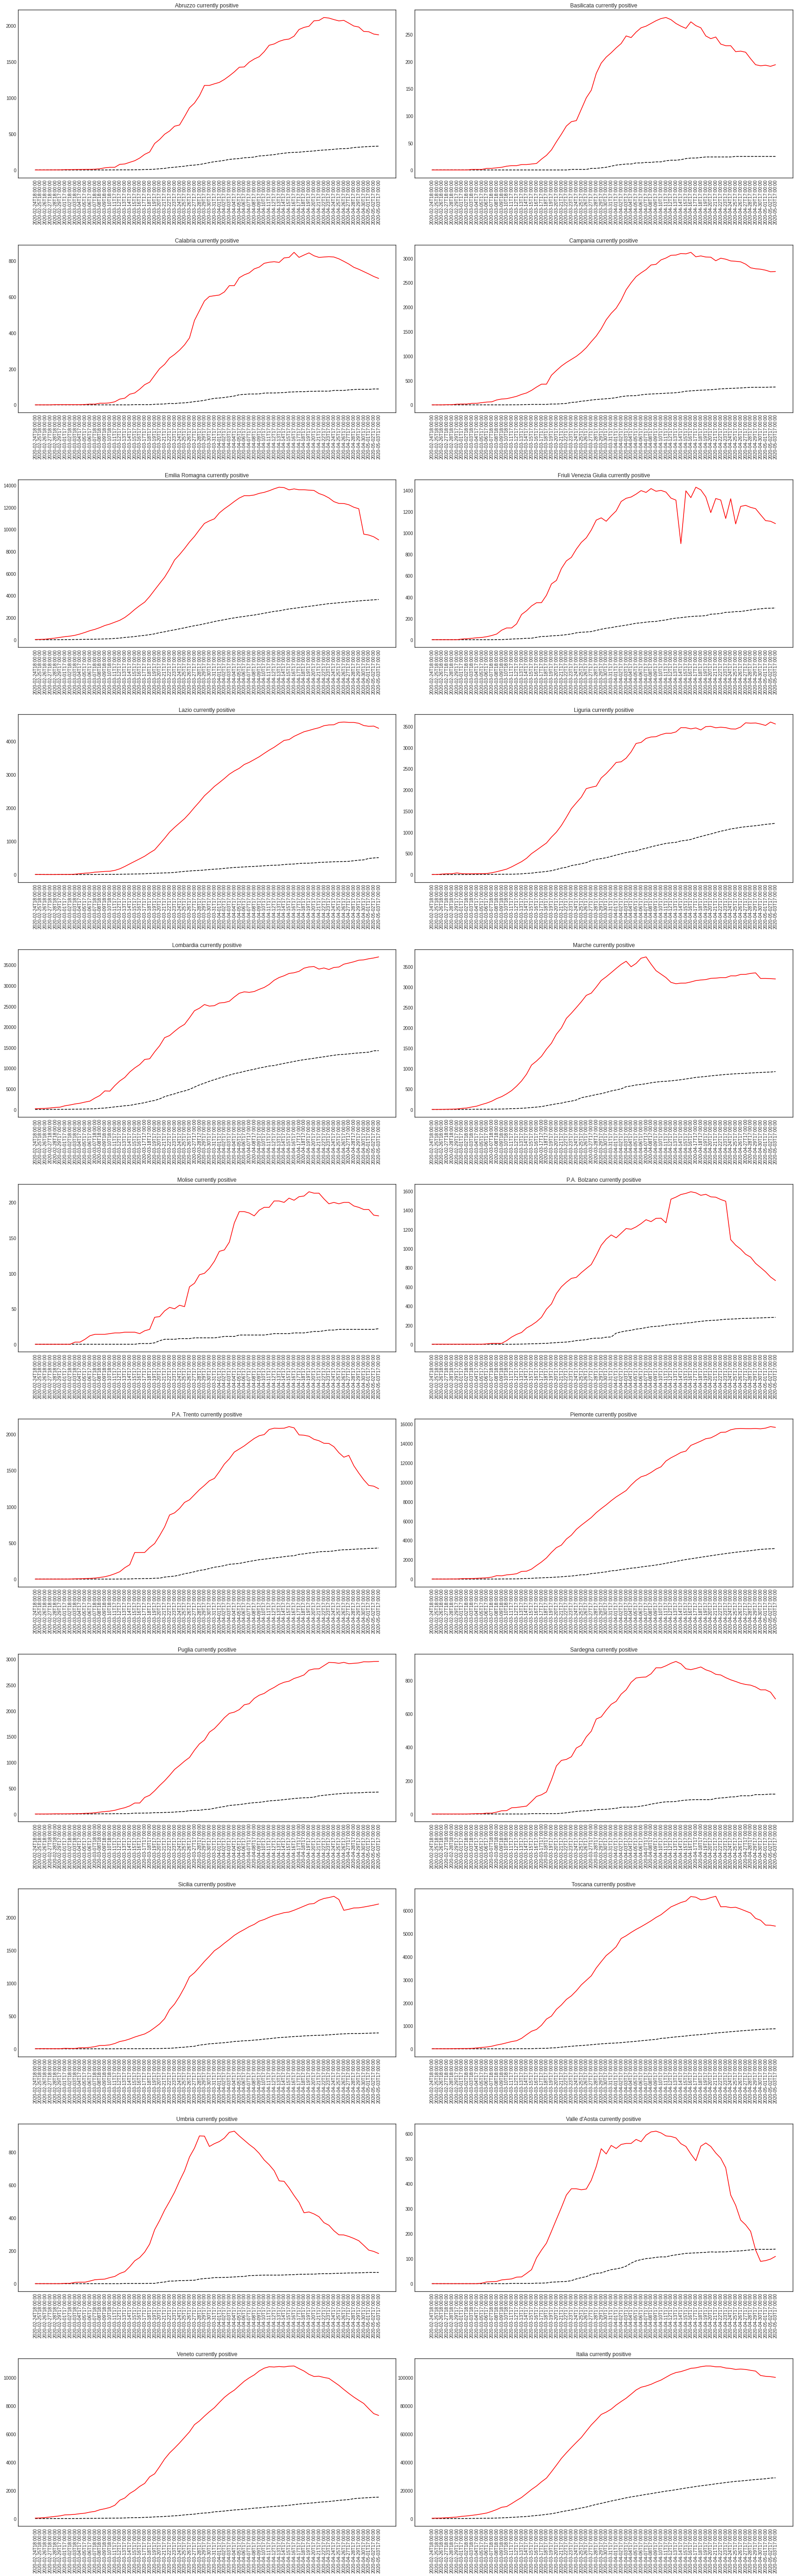

In [5]:
columns = list(italy_dead)
i=1
f = plt.figure(figsize=(30,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
for region in columns: 
    ax = f.add_subplot(11, 2, i)
    region_positive = italy_currently_positive[[region]]
    region_positive.columns = ['Positive']
    region_dead = italy_dead[[region]]
    region_dead.columns = ['Dead']
    ax.plot(region_dead.index, region_dead.Dead, '--k')
    ax.plot(region_positive.index, region_positive['Positive'], '-r')
    ax.set_title(region + ' currently positive')
    ax.set_xticklabels(region_positive.index,rotation=90)
    i=i+1


Il numero di positivi assoluto è ancora in aumento in alcune regioni ma vedremo più avanti la sua dipendenza dal numero di tamponi 
 
Segue una comparazione tra regioni relativa al numero di attualmente positivi

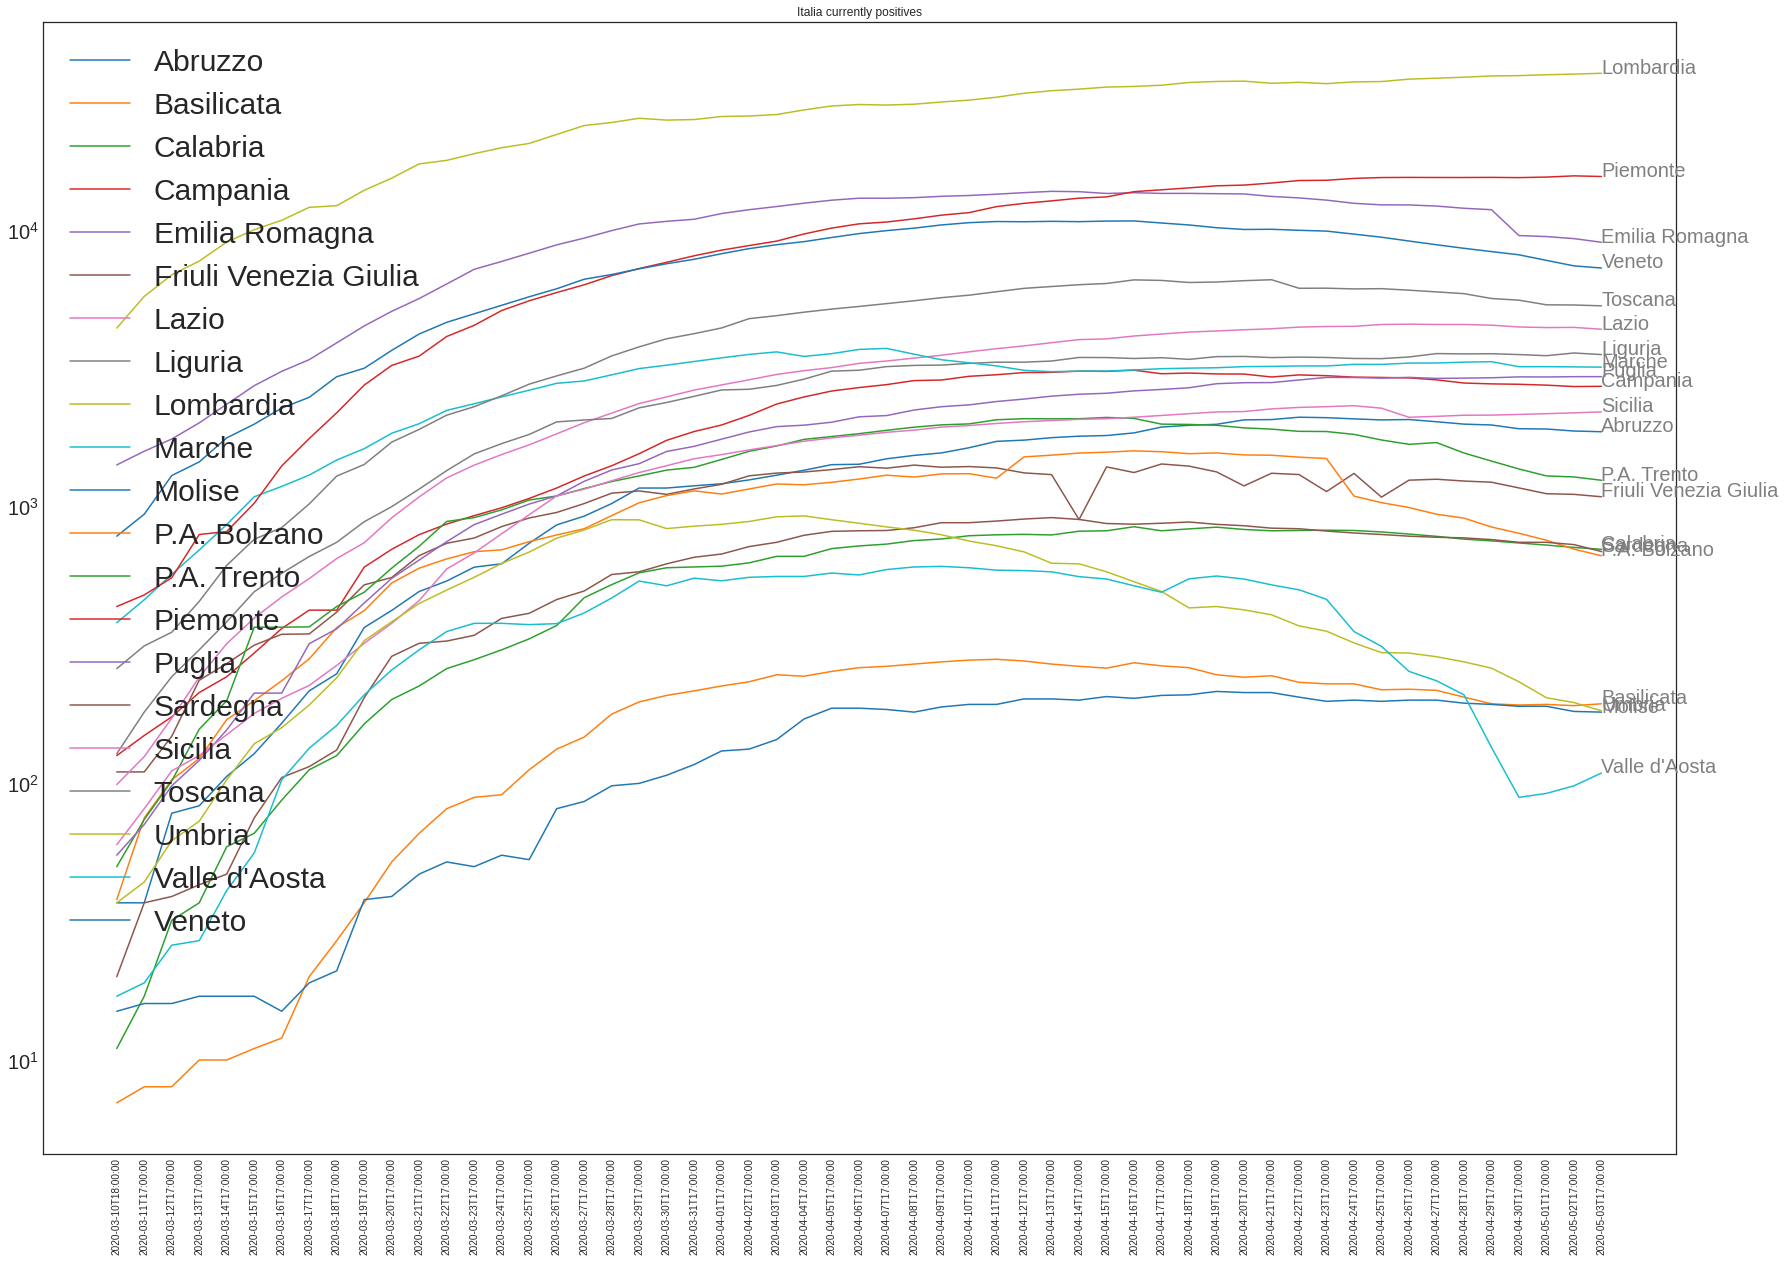

In [6]:
style = dict(size=20, color='gray')
columns = list(italy_dead)
last_day = covid['date'].max()
first_interesting = 15
f = plt.figure(figsize=(60,50))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
for region in columns: 
    if (region != 'Italia'):
        region_positive = italy_currently_positive[[region]]
        region_positive = region_positive[first_interesting:]
        region_positive.columns = ['Positive']
        ax.plot(region_positive.index, region_positive['Positive'], label=region)
        ax.text(italy_currently_positive.shape[0]-first_interesting-1, region_positive.loc[last_day, 'Positive'], region, **style)

ax.set_title(region + ' currently positives')
ax.set_xticklabels(region_positive.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('log')
plt.legend(loc="upper left", prop={'size': 30})


Normalizziamo i dati rispetto alla popolazione di ogni regione

In [0]:
 #source: https://www.tuttitalia.it/regioni/
population_density = pd.DataFrame([
              {'denominazione_regione': 'Abruzzo', 'density': 121, 'population': 1311580},
              {'denominazione_regione': 'Basilicata', 'density': 56, 'population': 562869},
              {'denominazione_regione': 'Calabria', 'density': 128, 'population': 1947131},
              {'denominazione_regione': 'Campania', 'density': 424, 'population': 5801692},
              {'denominazione_regione': 'Emilia Romagna', 'density': 199, 'population': 4459477},
              {'denominazione_regione': 'Friuli Venezia Giulia', 'density': 153, 'population': 1215220},
              {'denominazione_regione': 'Lazio', 'density': 341, 'population': 5879082},
              {'denominazione_regione': 'Liguria', 'density': 286, 'population': 1550640},
              {'denominazione_regione': 'Lombardia', 'density': 422, 'population': 10060574},
              {'denominazione_regione': 'Marche', 'density': 162, 'population': 1525271},
              {'denominazione_regione': 'Molise', 'density': 69, 'population': 305617},
              {'denominazione_regione': 'P.A. Bolzano', 'density': 79, 'population': 536137},
              {'denominazione_regione': 'P.A. Trento', 'density': 79, 'population': 536137},
              {'denominazione_regione': 'Piemonte', 'density': 172, 'population': 4356406},
              {'denominazione_regione': 'Puglia', 'density': 206, 'population': 4029053},
              {'denominazione_regione': 'Sardegna', 'density': 68, 'population': 1639591},
              {'denominazione_regione': 'Sicilia', 'density': 194, 'population': 4999891},
              {'denominazione_regione': 'Toscana', 'density': 162, 'population': 3729641},
              {'denominazione_regione': 'Umbria', 'density': 104, 'population': 882015},
              {'denominazione_regione': 'Valle d\'Aosta', 'density': 39, 'population': 125666},
              {'denominazione_regione': 'Veneto', 'density': 267, 'population': 4905854}
            ])

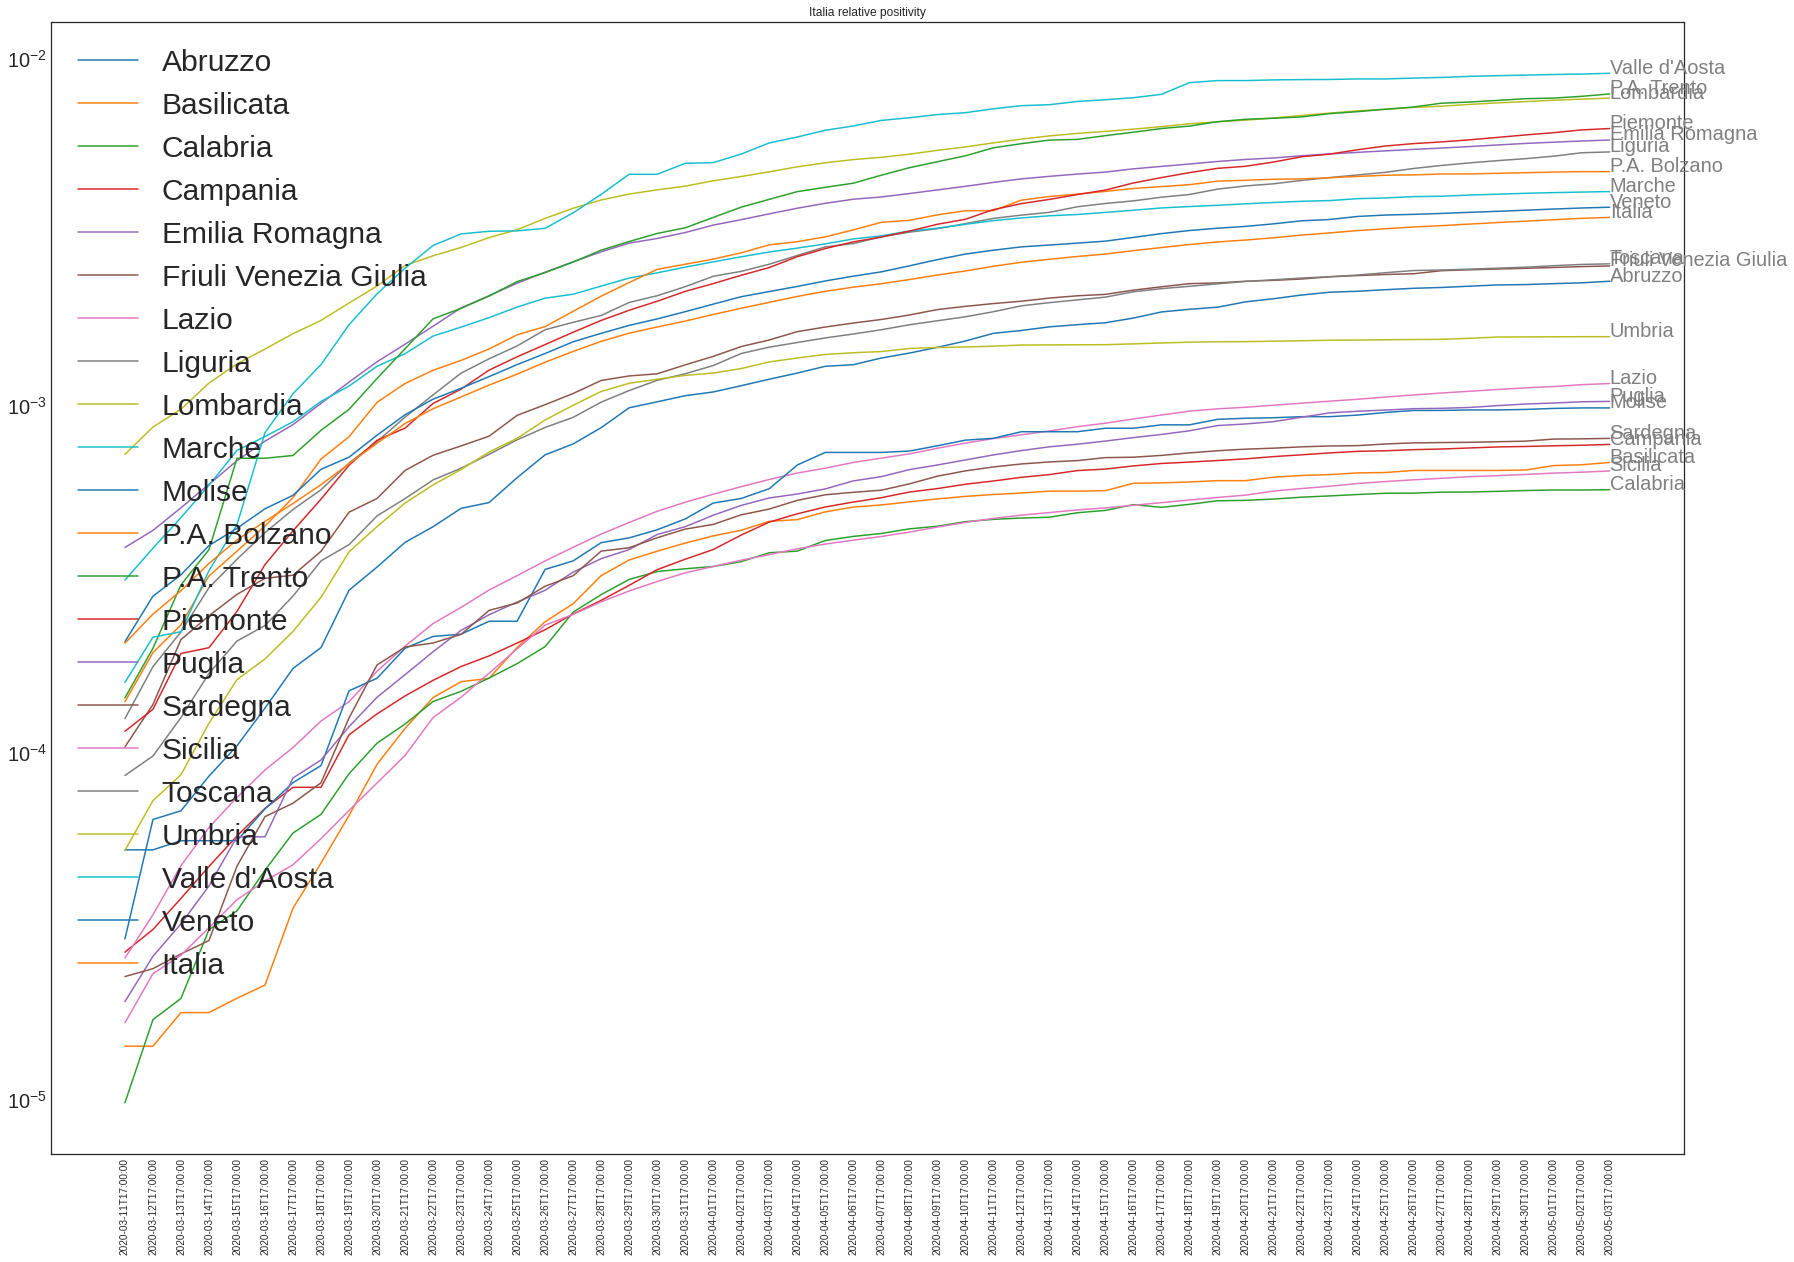

In [8]:
style = dict(size=20, color='gray')
columns = list(italy_total_positive)
last_day = covid['date'].max()
italy_total_positive_normalized = italy_total_positive.copy()
tempdf = pd.DataFrame([{'denominazione_regione': 'Italia', 'population': population_density['population'].sum()}])
population = population_density[['denominazione_regione', 'population']]
population = population.append(tempdf, ignore_index = True)
population_pivot = population.pivot_table('population', columns='denominazione_regione')
first_interesting = 16
f = plt.figure(figsize=(60,50))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
i = 0
for region in columns: 
    region_relative_positivity = italy_total_positive[region]/population_pivot.loc['population', region]
    region_relative_positivity = region_relative_positivity[first_interesting:]
    ax.plot(region_relative_positivity.index, region_relative_positivity, label=region)
    ax.text(italy_total_positive.shape[0]-first_interesting-1, region_relative_positivity.loc[last_day], region, **style)
    i=i+1

ax.set_title(region + ' relative positivity')
ax.set_xticklabels(region_relative_positivity.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('log')
plt.legend(loc="upper left", prop={'size': 30})

La Valle d\'Aosta continua ad essere la regione con la maggior densità di contagiati ufficiali

Mentre la curva dei totali positivi (quindi comprensiva di guariti e deceduti) avrà un andamento sigmoidale, ossia tipo questo:


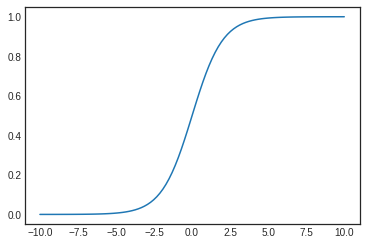

In [9]:
x = np.linspace(-10, 10, 100)
y = 1/(1 + np.exp(-x))
plt.plot(x, y)
plt.show()

... ci si aspetta che quella degli attualmente positivi raggiunga un picco per poi quindi scendere, magari con una discesa più lenta rispetto alla salita, ed infine tendere a zero: 

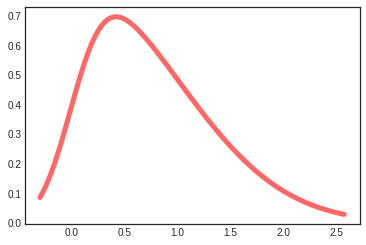

In [10]:
from scipy.stats import skewnorm
fig, ax = plt.subplots(1, 1)
a = 4
x = np.linspace(skewnorm.ppf(0.01, a), skewnorm.ppf(0.99, a), 100)
ax.plot(x, skewnorm.pdf(x, a), 'r-', lw=5, alpha=0.6, label='skewnorm pdf')

Grazie al lockdown il picco effettivo è stato più basso e più lontano nel tempo rispetto a quello che si sarebbe verificato senza interventi, secondo quanto descritto in questo [studio](https://www.visualcapitalist.com/infection-trajectory-flattening-the-covid19-curve/?fbclid=IwAR3KsS0FJgZPdCwoj0uw7qNO5bagm59eKdg85C12Wjw3T0w8mODXaX9iU8g)

Segue una comparazione tra regioni relativa al numero di deceduti, anch'essa rapportata alla popolazione

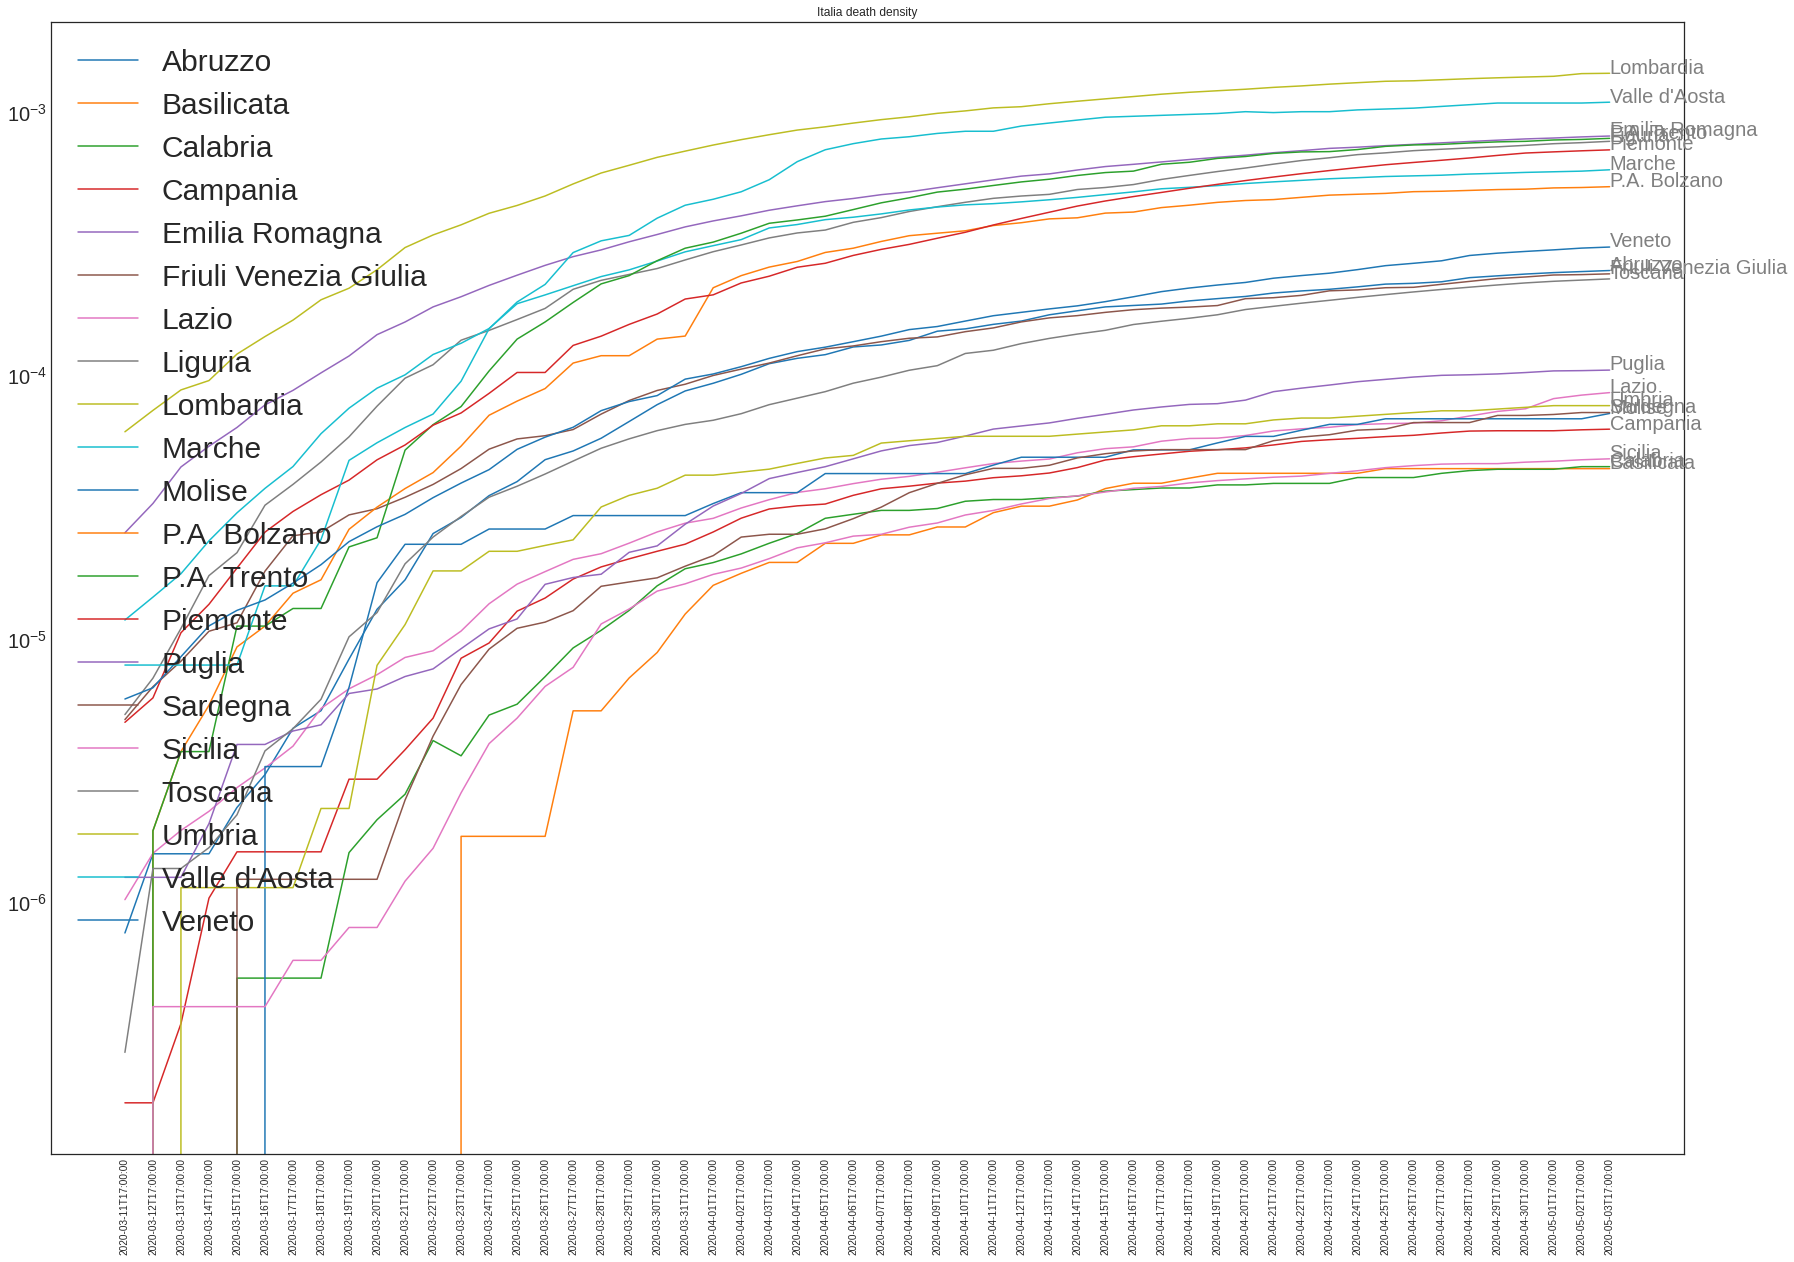

In [11]:
style = dict(size=20, color='gray')
columns = list(italy_dead)
last_day = covid['date'].max()
first_interesting = 16
f = plt.figure(figsize=(60,50))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
i = 0
for region in columns: 
    if (region != 'Italia'):
        region_dead = italy_dead[[region]]/population_pivot.loc['population', region]
        region_dead = region_dead[first_interesting:]
        region_dead.columns = ['Dead']
        ax.plot(region_dead.index, region_dead['Dead'], label=region)
        ax.text(italy_dead.shape[0]-first_interesting-1, region_dead.loc[last_day, 'Dead'], region, **style)
        i=i+1

ax.set_title(region + ' death density')
ax.set_xticklabels(region_dead.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('log')
plt.legend(loc="upper left", prop={'size': 30})


Curiosamente si configurano quattro fasce ben distinte. In prima fascia Lombardia e Valle d\'Aosta.
Ricordiamo però le [considerazioni](https://www.repubblica.it/cronaca/2020/04/01/news/istat_dramma_cornavirus_al_nord-252910084/) dell'ISTAT secondo cui il numero di deceduti, soprattutto al Nord, supera di molto la media dello stesso periodo degli anni precedenti e supera la stessa cifra ufficiale indicata dalla Protezione Civile


Nella seguente grafica viene rappresentata l'istantanea del rapporto tra deceduti e totali positivi su tutte le regioni, giorno per giorno, con media mobile a 3 giorni


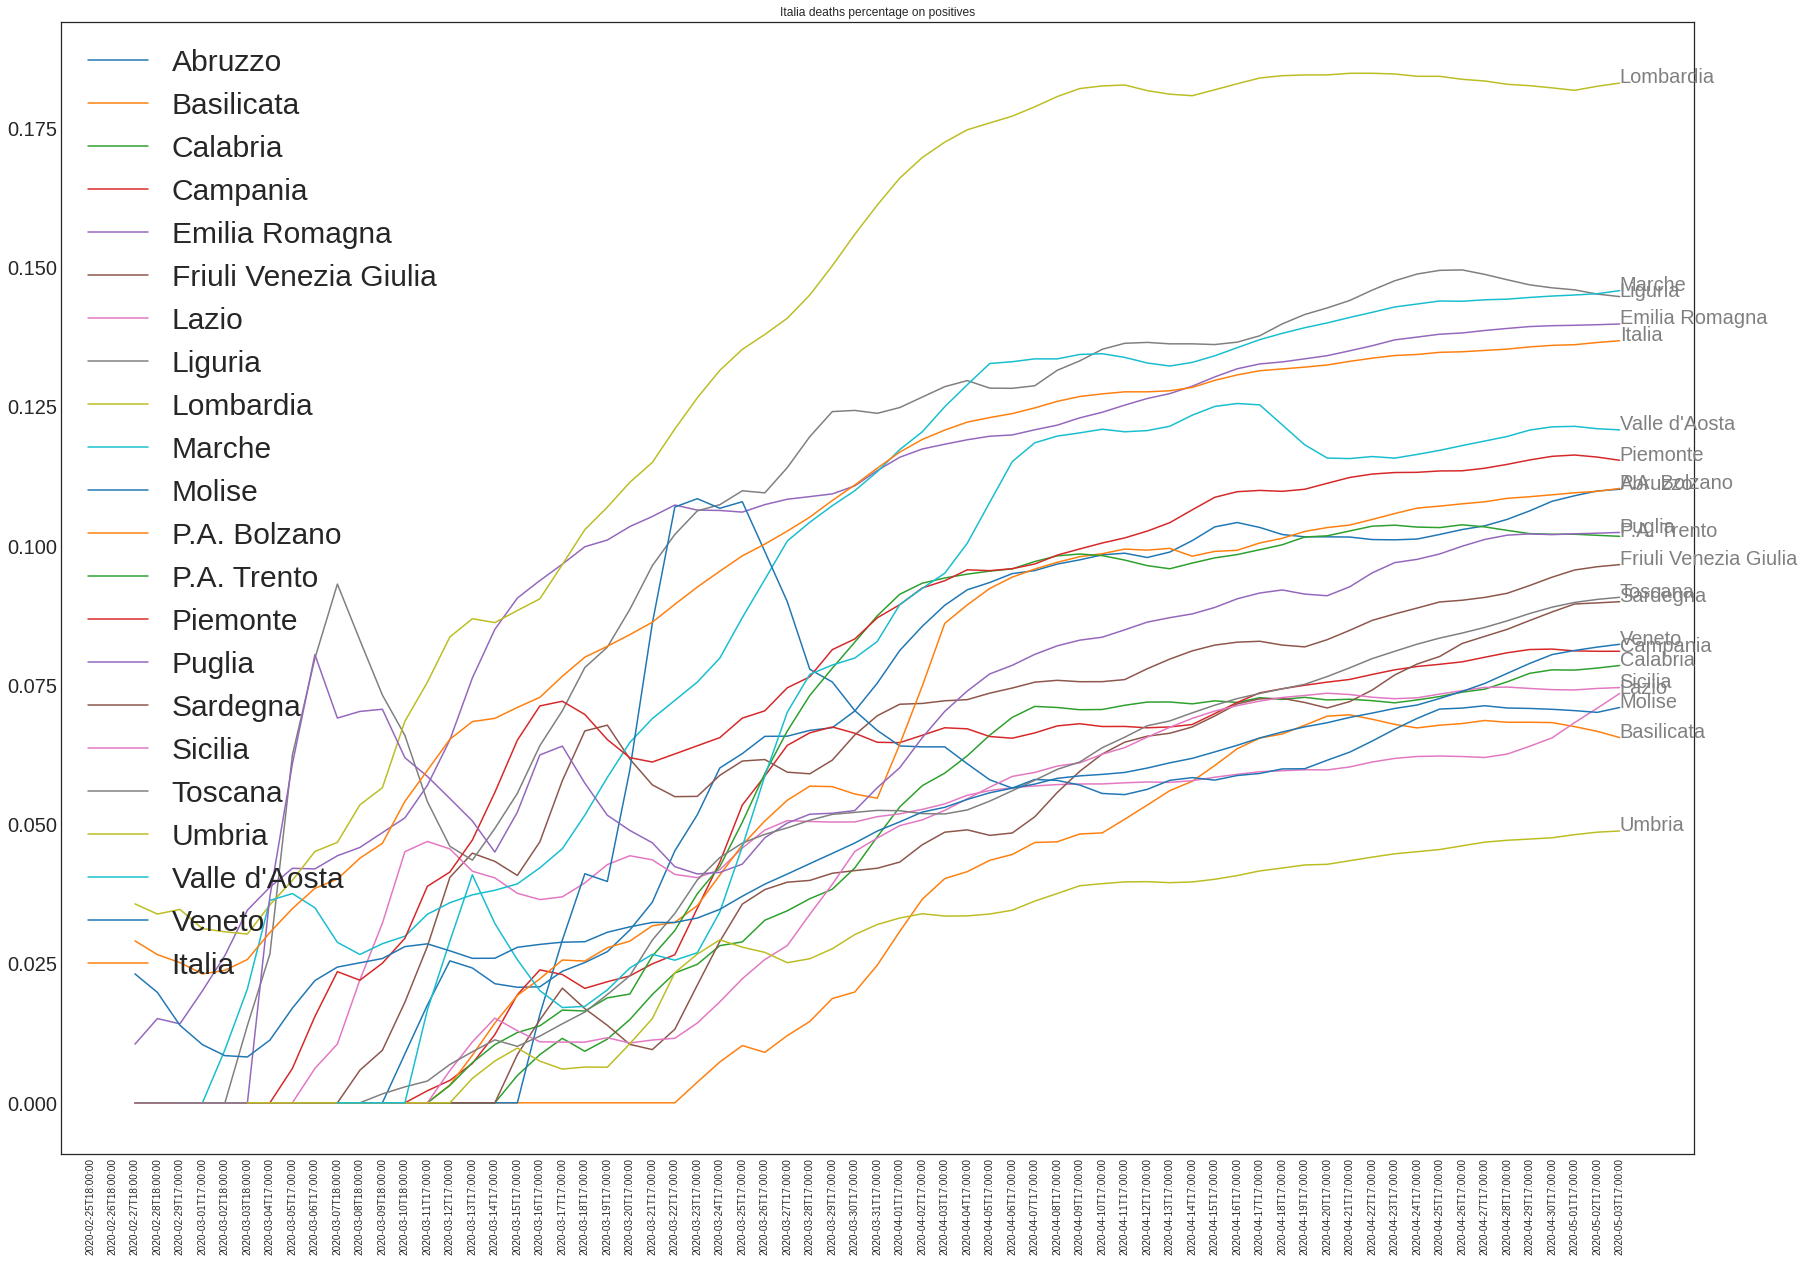

In [12]:
italy_dead_vs_total = italy_dead/italy_total_positive
style = dict(size=20, color='gray')
columns = list(italy_dead_vs_total)
last_day = covid['date'].max()
first_interesting = 1
f = plt.figure(figsize=(60,50))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
i = 0
for region in columns: 
    region_dead = italy_dead_vs_total[[region]]
    region_dead = region_dead[first_interesting:]
    region_dead.columns = ['Dead_percentage']
    ax.plot(region_dead.index, region_dead['Dead_percentage'].rolling(window=3).mean(), label=region)
    ax.text(italy_dead_vs_total.shape[0]-first_interesting-1, region_dead.rolling(window=3).mean().loc[last_day, 'Dead_percentage'], region, **style)
    i=i+1

ax.set_title(region + ' deaths percentage on positives')
ax.set_xticklabels(region_dead.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('linear')
plt.legend(loc="upper left", prop={'size': 30})


Anche se i valori reali saranno maggiori, la Lombardia rimane di gran lunga la regione dove il Coronavirus ha ucciso di più. Anche Liguria, Emilia Romagna e Marche sopra la media nazionale.

Si ravvisano differenze anche di un ordine di grandezza tra Umbria (la regione meno "letale") e la Lombardia


Ma l'analisi più interessante è quella del rapporto tra numero di attualmente positivi e numero di tamponi effettuati, dato più realistico in quanto il numero di casi testati è la "popolazione" di riferimento. Un numero o un incremento anomalo del numero di positivi in una regione può essere fuorviante perchè dovuto ad un aumento dei test eseguiti

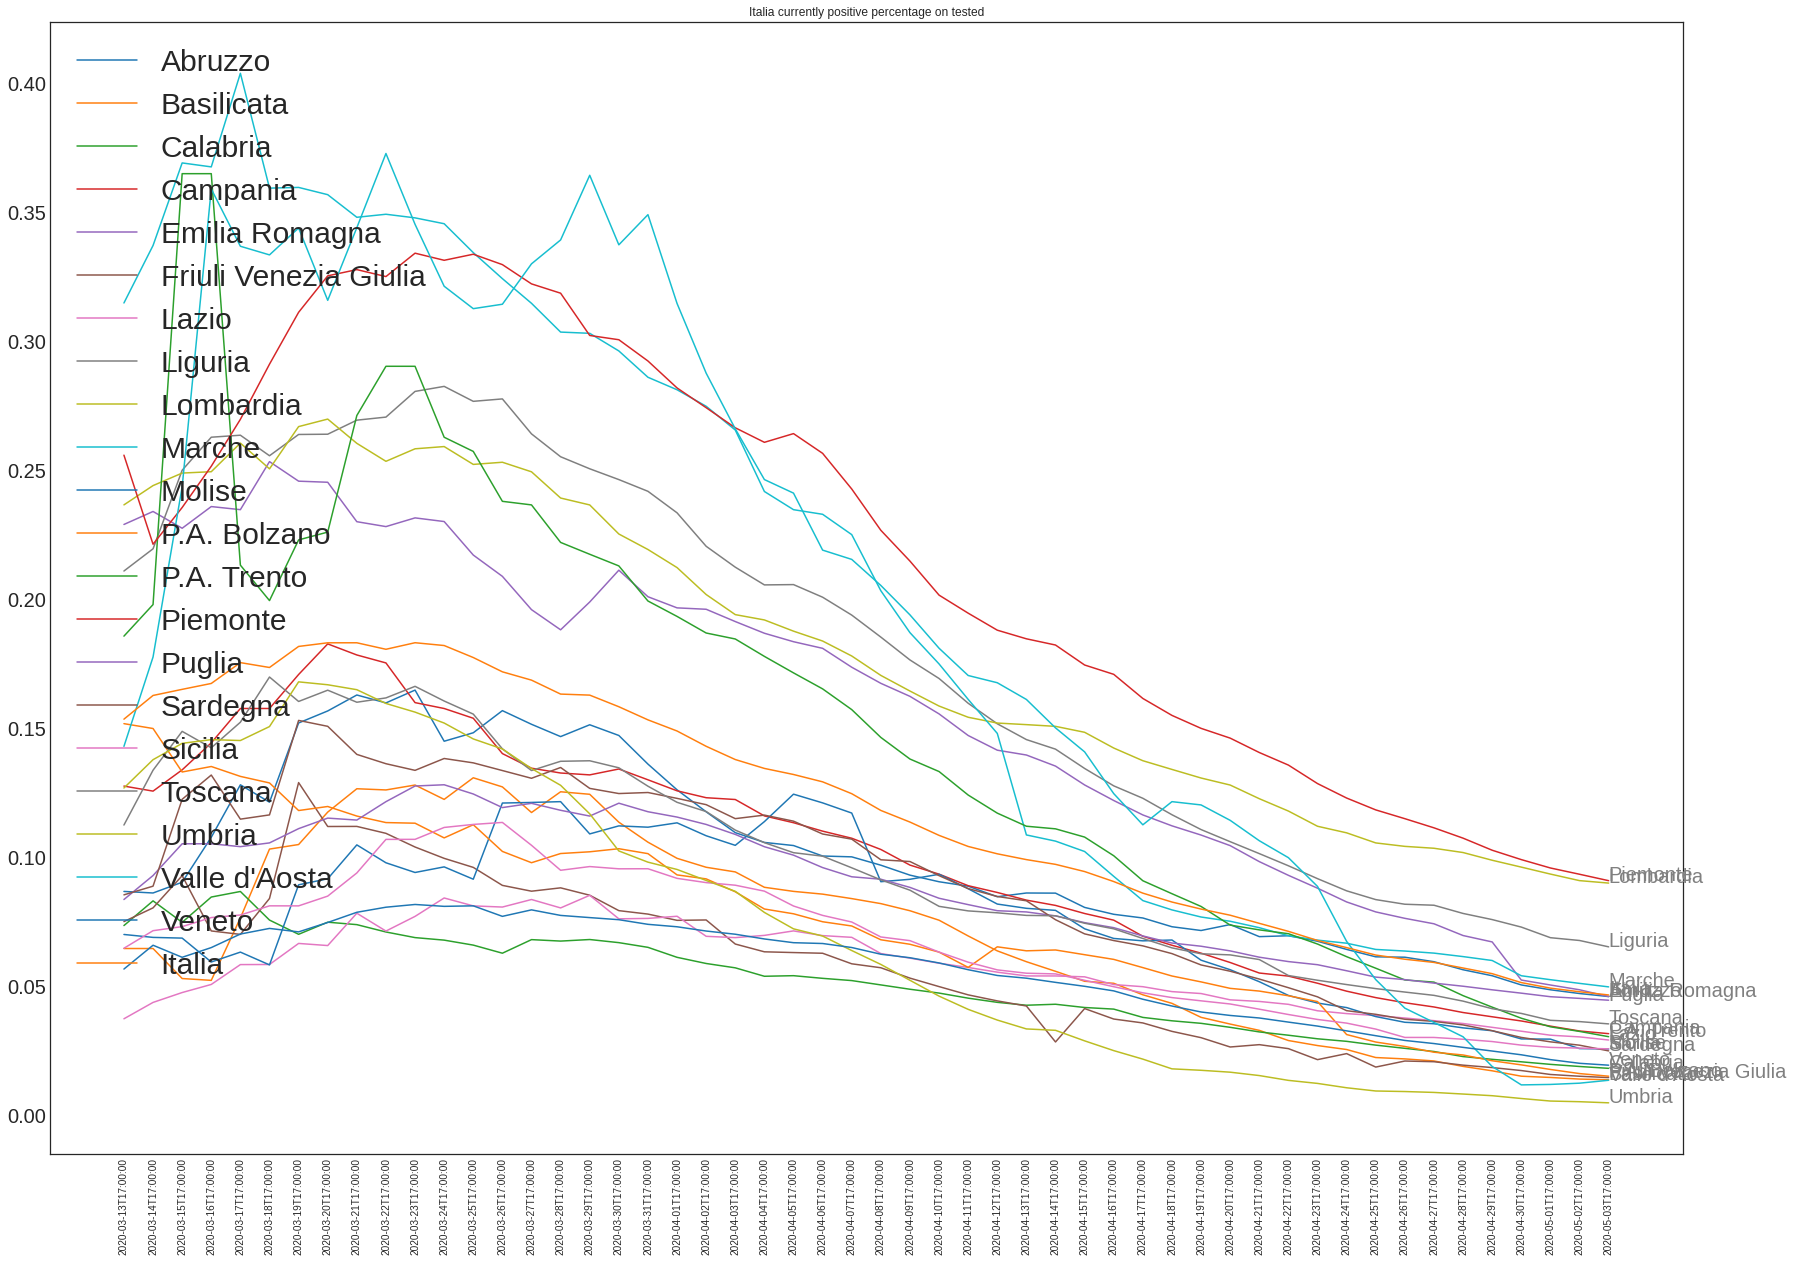

In [13]:
style = dict(size=20, color='gray')
columns = list(italy_tested)
last_day = covid['date'].max()
first_interesting = 18
f = plt.figure(figsize=(60,50))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
for region in columns: 
    region_positive_vs_tested = italy_currently_positive[[region]]/italy_tested[[region]]
    region_positive_vs_tested = region_positive_vs_tested[first_interesting:]
    ax.plot(region_positive_vs_tested.index, region_positive_vs_tested, label=region)
    ax.text(italy_currently_positive.shape[0]-first_interesting-1, region_positive_vs_tested.loc[last_day], region, **style)

ax.set_title(region + ' currently positive percentage on tested')
ax.set_xticklabels(region_positive_vs_tested.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('linear')
plt.legend(loc="upper left", prop={'size': 30})

Considerando quindi il numero di test eseguiti il picco sembra stato globalmente superato il 24/3. In seguito calo generalizzato, più deciso dove il tasso era più alto. Agli estremi Umbria, con circa lo l'1% di test positivi e la coppia Piemonte-Lombardia con il 10%. Anche la Liguria è decisamente sopra la media. 

In [36]:
italy_cumulative_positive_vs_tested = italy_currently_positive/italy_tested
italy_cumulative_positive_vs_tested.loc[last_day].sort_values(ascending=False)

denominazione_regione
Piemonte                 0.090809
Lombardia                0.089876
Liguria                  0.065166
Marche                   0.049649
Italia                   0.046513
Abruzzo                  0.045898
Emilia Romagna           0.045896
Puglia                   0.044474
Toscana                  0.035305
Campania                 0.031515
P.A. Trento              0.030344
Lazio                    0.029057
Sicilia                  0.025630
Molise                   0.025583
Sardegna                 0.024840
Veneto                   0.019299
Calabria                 0.018076
P.A. Bolzano             0.015032
Friuli Venezia Giulia    0.014495
Basilicata               0.013652
Valle d'Aosta            0.013457
Umbria                   0.004714
Name: 2020-05-03T17:00:00, dtype: float64

Vediamo la dinamica del fenomeno con una media mobile a 4 giorni, dal momento che i dati grezzi mostrano un'oscillazione con periodo giornaliero.


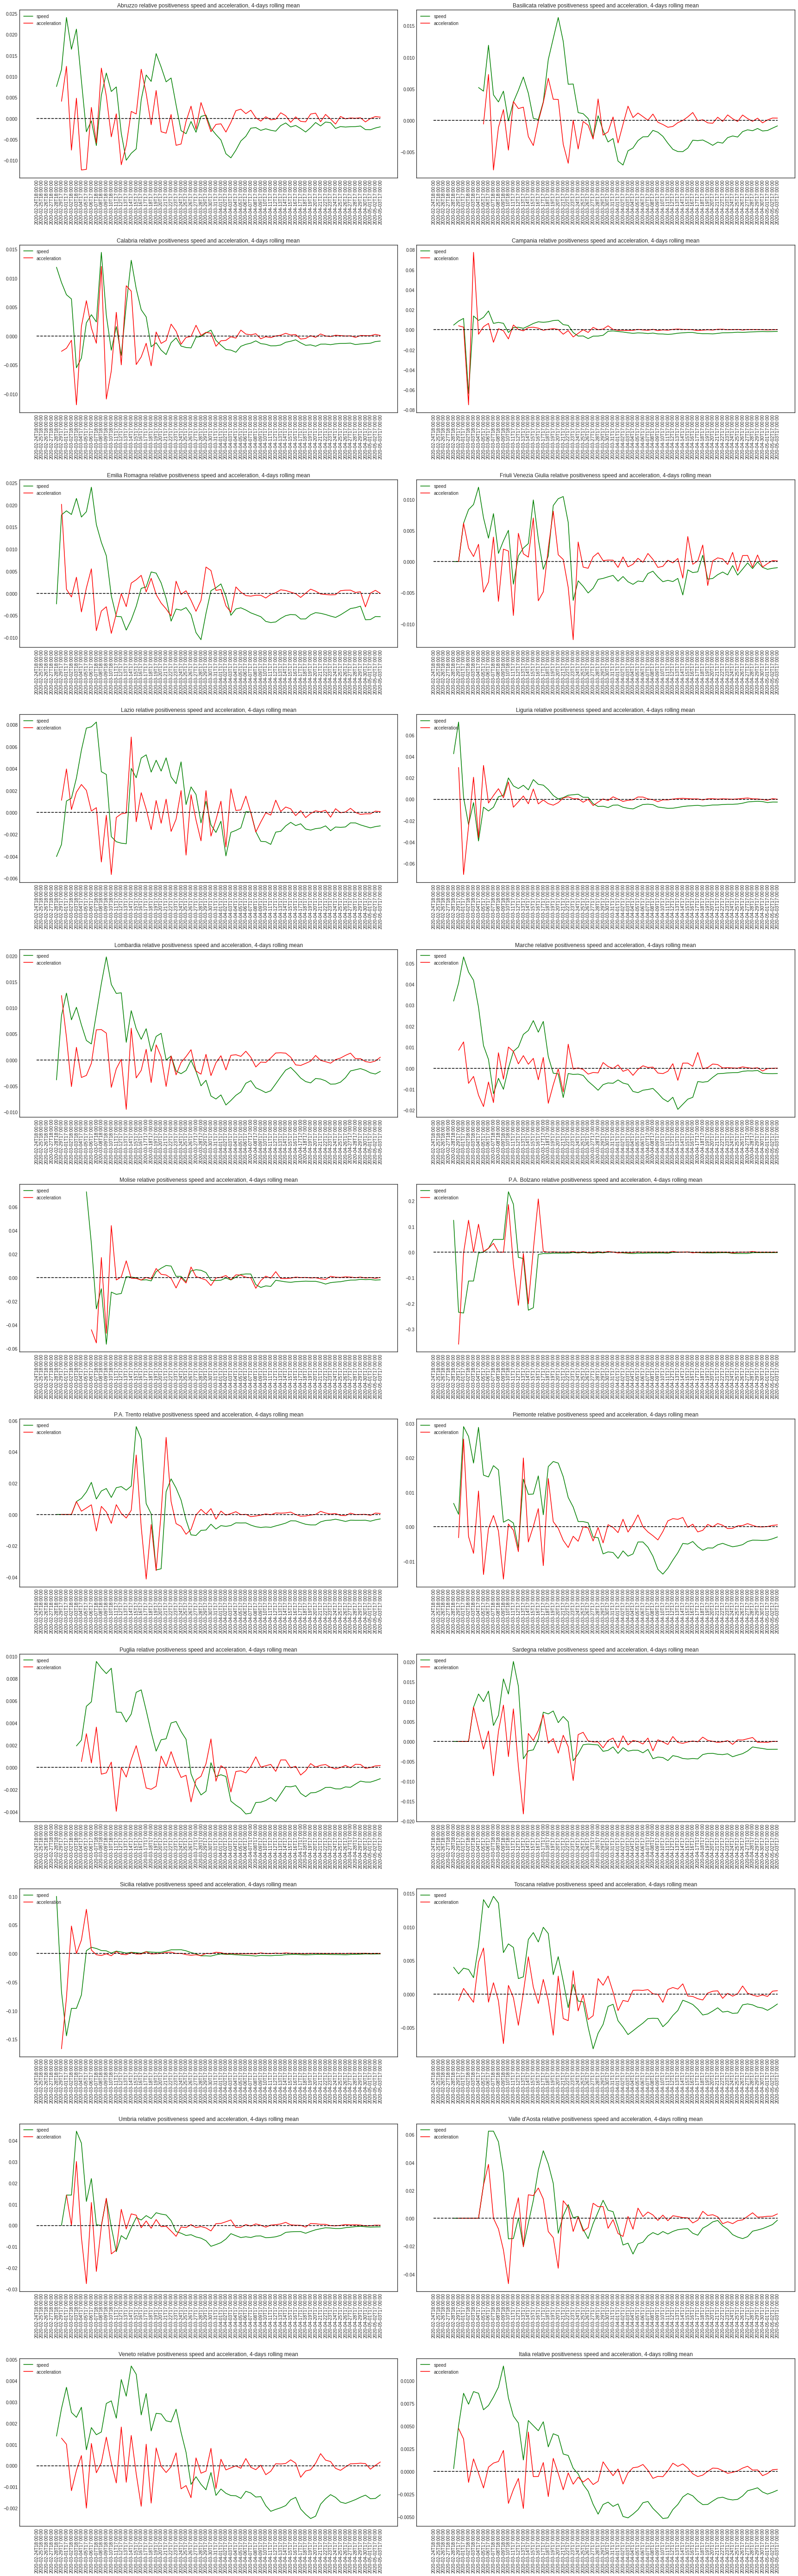

In [14]:
columns = list(italy_tested)
i=1
f = plt.figure(figsize=(30,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
for region in columns: 
    ax = f.add_subplot(11, 2, i)
    region_positive_vs_tested = italy_currently_positive[[region]]/italy_tested[[region]]
    region_positive_vs_tested.columns = ['Positive']
    ax.plot(region_positive_vs_tested.index, region_positive_vs_tested['Positive'].rolling(window=4).mean().diff(), '-g', label='speed')
    ax.set_title(region + ' currently positive delta')
    ax.set_xticklabels(region_positive_vs_tested.index,rotation=90)
    ax.plot(region_positive_vs_tested.index, region_positive_vs_tested['Positive'].rolling(window=4).mean().diff().diff(), '-r', label='acceleration')
    ax.plot(region_positive_vs_tested.index, np.zeros(region_positive_vs_tested.index.size), '--k')
    ax.set_title(region + ' relative positiveness speed and acceleration, 4-days rolling mean')
    ax.set_xticklabels(region_positive_vs_tested.index,rotation=90)
    ax.legend(loc='upper left', frameon=False)
    i=i+1


In Veneto si registra la discesa più sostenuta. In Emilia Romagna, Piemonte, Puglia, Toscana e Lazio discesa non marcata ma costante. Altrove la situazione è stagnante (in particolare dove i nuovi contagi sono molto bassi).

Visti i dati cumulativi vediamo quelli istantanei

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


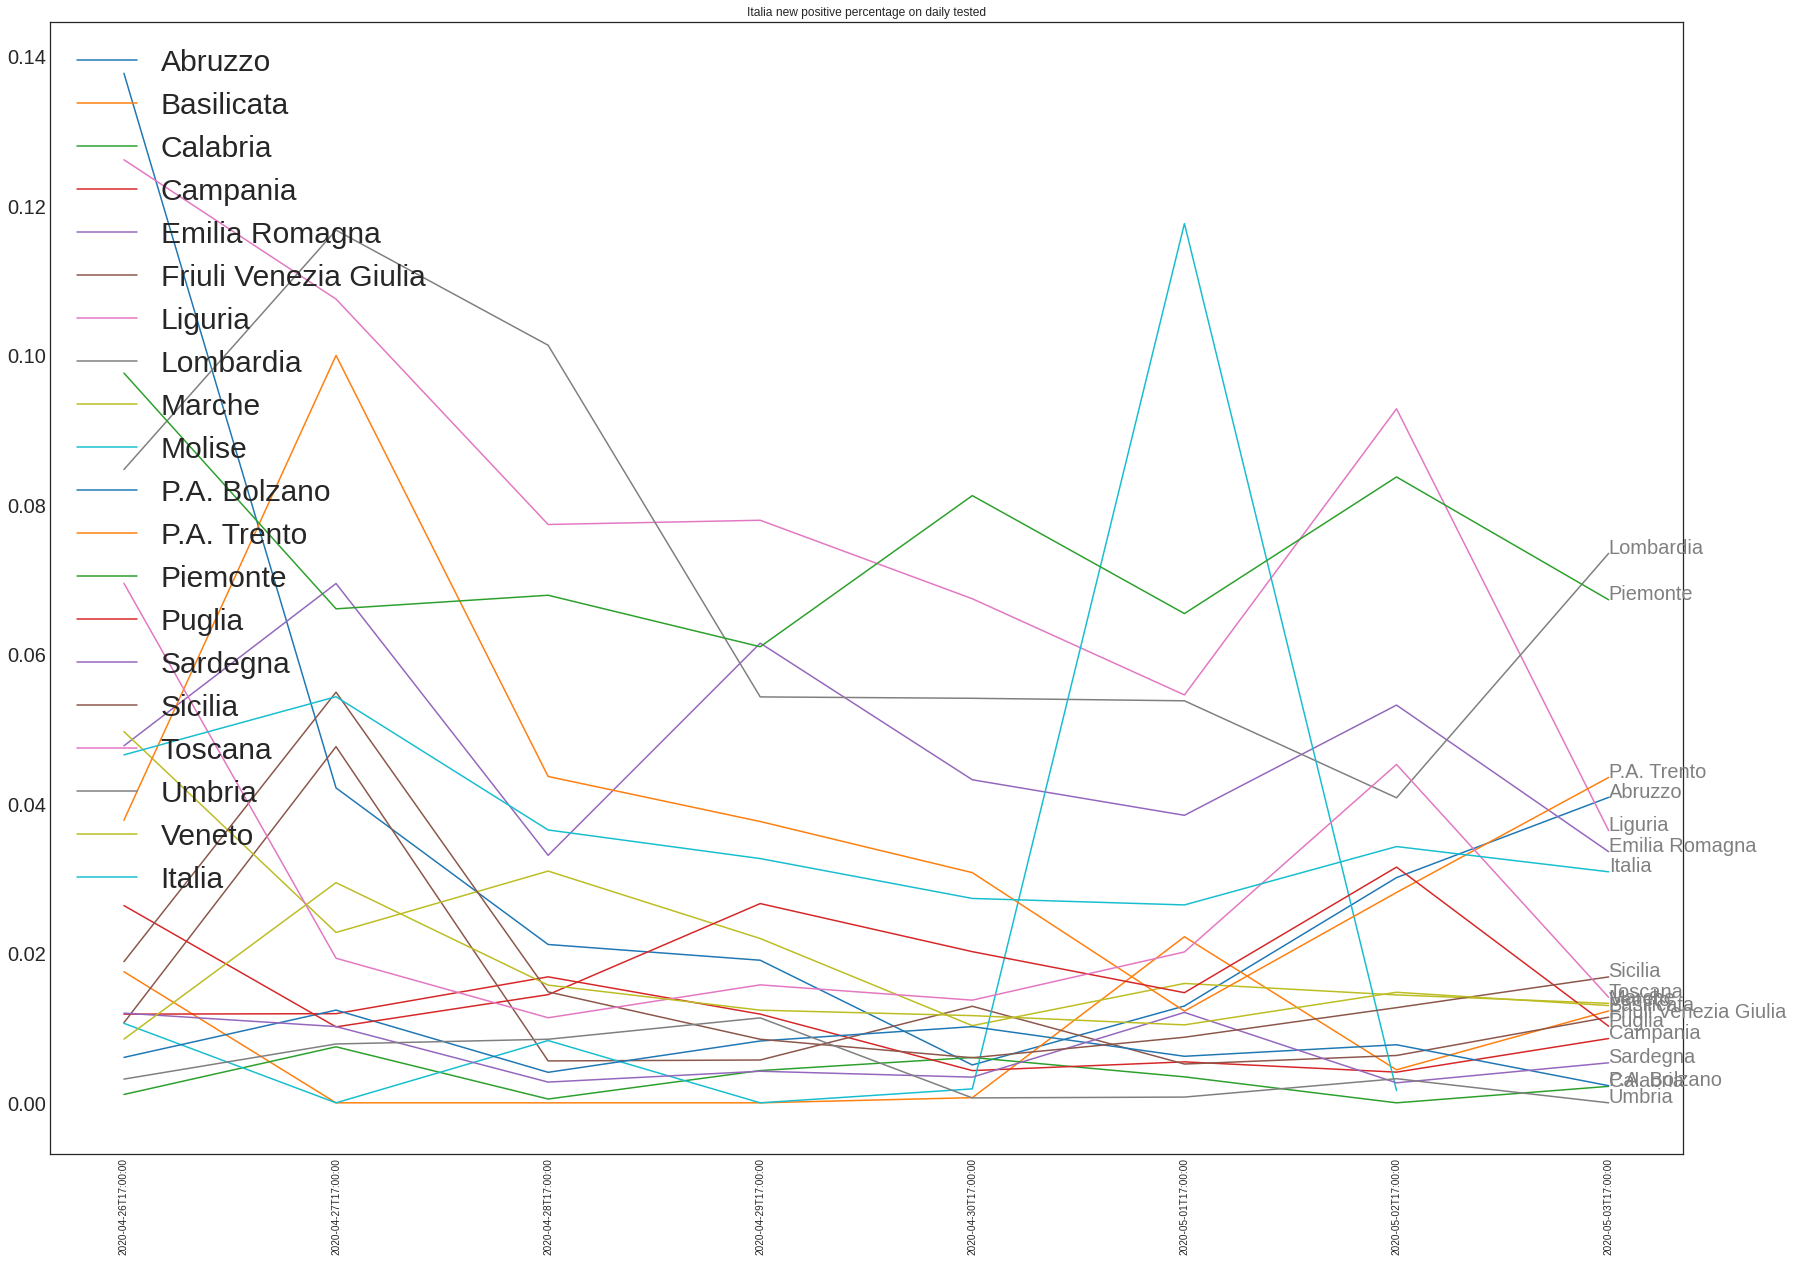

In [17]:
style = dict(size=20, color='gray')
columns = list(italy_tested)
last_day = covid['date'].max()
first_interesting = 62
f = plt.figure(figsize=(60,50))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
for region in columns: 
  if (region!='Valle d\'Aosta') and (region!='Lazio'):
        region_positive_vs_tested = italy_new_positive[[region]]/italy_tested[[region]].diff()
        region_positive_vs_tested = region_positive_vs_tested[first_interesting:].clip(0, 0.3)
        ax.plot(region_positive_vs_tested.index, region_positive_vs_tested, label=region)
        ax.text(italy_new_positive.shape[0]-first_interesting-1, region_positive_vs_tested.loc[last_day], region, **style)

ax.set_title(region + ' new positive percentage on daily tested')
ax.set_xticklabels(region_positive_vs_tested.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('linear')
plt.legend(loc="upper left", prop={'size': 30})

Oggi Lombardia e Piemonte sono state le regioni col maggior numero di positivi in rapporto al numero di tamponi eseguiti, scavalcando la Liguria che aveva il primato ieri.
Fenomeno poco spiegabile se non con l'ipotesi che il contagio avvenga negli unici posti chiusi dove si possa verificare qualche assembramento, ossia aziende, supermercati, negozi e ascensori, dove non tutti indossano la mascherina.


A livello globale si registra una situazione stazionaria ma in alcune regioni si rileva un'inversione di tendenza: Lombardia, Provincia di Trento, Abruzzo, Sicilia e, in misura minore, varie altre regioni.

Vediamo anche il dato splittato regione per regione

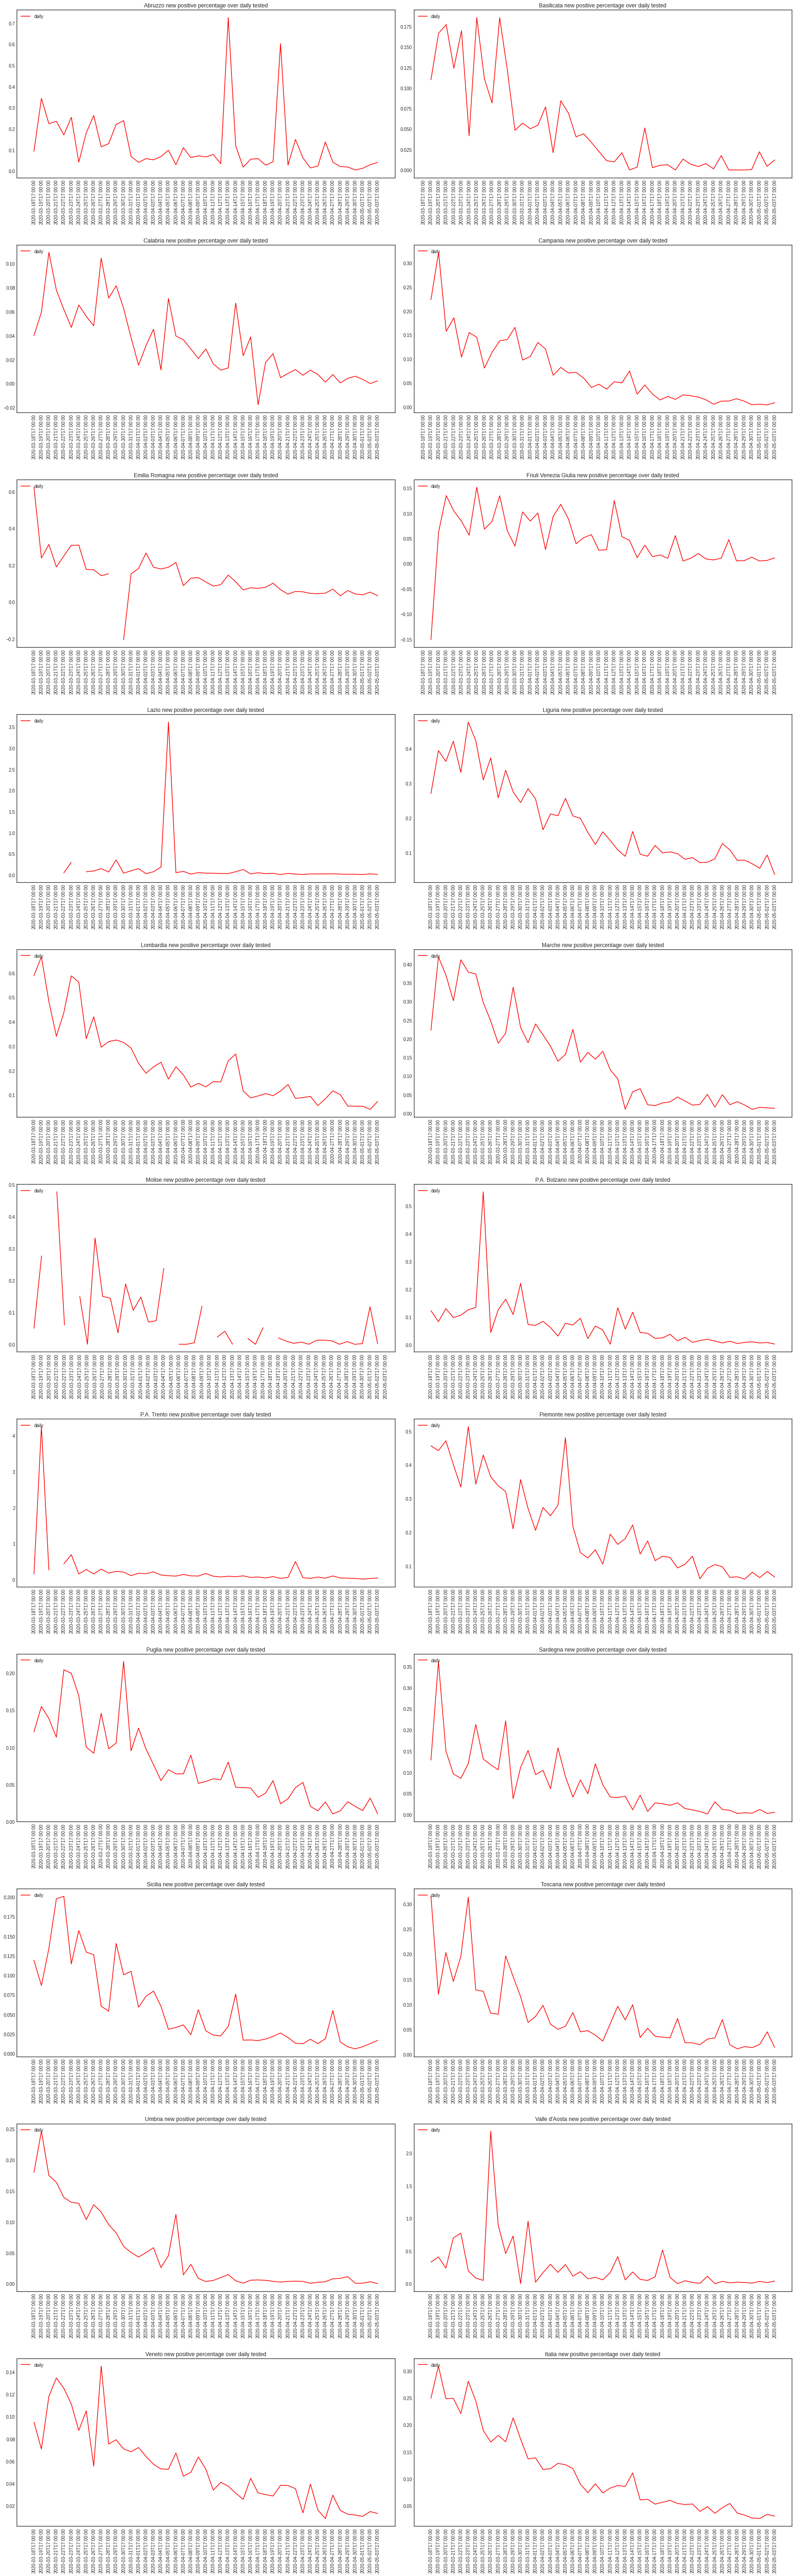

In [19]:
columns = list(italy_tested)
i=1
first_interesting = 23
f = plt.figure(figsize=(30,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
for region in columns: 
    ax = f.add_subplot(11, 2, i)
    region_new_positive_vs_tested = italy_new_positive[[region]]/italy_tested[[region]].diff()
    region_new_positive_vs_tested.columns = ['Positive_perc']
    region_new_positive_vs_tested = region_new_positive_vs_tested[first_interesting:]
    ax.plot(region_new_positive_vs_tested.index, region_new_positive_vs_tested['Positive_perc'], '-r', label='daily')
    #ax.plot(region_new_positive_vs_tested.index, region_new_positive_vs_tested['Positive_perc'].rolling(window=5).mean(), '--k', label='rolling window (5 days)')
    ax.set_title(region + ' new positive percentage over daily tested')
    ax.set_xticklabels(region_new_positive_vs_tested.index,rotation=90)
    ax.legend(loc='upper left', frameon=False)
    i=i+1


In [20]:
italy_tested['Liguria'].diff().loc[last_day]

1290.0

In [21]:
italy_new_positive['Liguria'].loc[last_day]

47

**Quanti positivi ci sono in totale?**

Studiamo il caso del Veneto e generalizziamolo

In [22]:
veneto_positive_vs_tested = italy_new_positive['Veneto']/italy_tested['Veneto'].diff()
veneto_positive_vs_tested.rolling(window=5).mean()

date
2020-02-24T18:00:00         NaN
2020-02-25T18:00:00         NaN
2020-02-26T18:00:00         NaN
2020-02-27T18:00:00         NaN
2020-02-28T18:00:00         NaN
                         ...   
2020-04-29T17:00:00    0.016440
2020-04-30T17:00:00    0.015560
2020-05-01T17:00:00    0.015940
2020-05-02T17:00:00    0.013007
2020-05-03T17:00:00    0.012459
Name: Veneto, Length: 70, dtype: float64

In [23]:
italy_tested['Veneto']

date
2020-02-24T18:00:00      2200
2020-02-25T18:00:00      3780
2020-02-26T18:00:00      4900
2020-02-27T18:00:00      6164
2020-02-28T18:00:00      7414
                        ...  
2020-04-29T17:00:00    337656
2020-04-30T17:00:00    349227
2020-05-01T17:00:00    362459
2020-05-02T17:00:00    370978
2020-05-03T17:00:00    378202
Name: Veneto, Length: 70, dtype: int64

[L'esperimento di Vò Euganeo](https://mattinopadova.gelocal.it/regione/2020/03/07/news/coronavirus-i-risultati-dei-2778-tamponi-a-vo-positivo-il-2-5-1.38563019) ha rilevato che su 2778 tamponi eseguiti a tappeto sulla popolazione del comune, in massima parte eseguiti tra il 25 ed il 29 febbraio, il 2,5% è risultato positivo. 

In tutto il Veneto, fino al giorno 29/2, sono stati totalmente eseguiti 8659 test (tolti quelli di Vò si tratta di test mirati e non a tappeto) e la percentuale di attualmente positivi (media mobile a 5 giorni) viene confermata al 2.5%.

Ipotizziamo allora che la media a 5 giorni del rapporto tra i valori giornalieri dei nuovi positivi e dei test effettuati possa essere utilizzata come stima della percentuale di contagiati totali di una popolazione.

Generalizzando questo esperimento, purtroppo isolato, si può sommariamente stimare che, ipotizzando valido il dato del 29/2 e quindi anche i successivi, la percentuale di contagiati in Veneto all'ultima rilevazione sia del 3.4% (4.6% due giorni fa).

Generalizzando ulteriormente, per l'ultima rilevazione e in una media mobile di 5 giorni, i dati sono quelli visualizzati nel precedente grafico e, nel dettaglio:

In [26]:
italy_new_tested = italy_tested.diff()
italy_positive_vs_tested = italy_new_positive/italy_new_tested
italy_positive_vs_tested.loc[last_day].sort_values(ascending=False)

denominazione_regione
Lombardia                0.073515
Piemonte                 0.067310
P.A. Trento              0.043536
Abruzzo                  0.040868
Valle d'Aosta            0.040268
Liguria                  0.036434
Emilia Romagna           0.033603
Italia                   0.030911
Sicilia                  0.016843
Toscana                  0.014121
Lazio                    0.013824
Marche                   0.013308
Veneto                   0.013012
Basilicata               0.012295
Friuli Venezia Giulia    0.011454
Puglia                   0.010252
Campania                 0.008603
Sardegna                 0.005355
P.A. Bolzano             0.002294
Calabria                 0.002205
Umbria                   0.000000
Molise                        NaN
Name: 2020-05-03T17:00:00, dtype: float64

In [27]:
italy_positive_vs_tested.rolling(window=5).mean().loc[last_day].sort_values(ascending=False)

denominazione_regione
Piemonte                 0.071757
Liguria                  0.065853
Lombardia                0.055313
Emilia Romagna           0.046004
P.A. Trento              0.030478
Italia                   0.030342
Valle d'Aosta            0.023896
Toscana                  0.021821
Abruzzo                  0.021620
Puglia                   0.020683
Lazio                    0.016393
Marche                   0.015206
Veneto                   0.012459
Sicilia                  0.010578
Friuli Venezia Giulia    0.008325
Basilicata               0.007925
P.A. Bolzano             0.006951
Campania                 0.006874
Sardegna                 0.005558
Calabria                 0.003212
Umbria                   0.003203
Molise                        NaN
Name: 2020-05-03T17:00:00, dtype: float64

In Italia, quindi, estendendo il caso Veneto, il 3% della popolazione sarebbe oggi contagiato (in Lombardia, Liguria e Piemonte la percentuale supera il 5%). E' infatti ormai assodato che il numero di contagi è molto maggiore di quello registrato: si segnala lo [studio dell'Imperial College](https://www.imperial.ac.uk/media/imperial-college/medicine/sph/ide/gida-fellowships/Imperial-College-COVID19-Europe-estimates-and-NPI-impact-30-03-2020.pdf) secondo il quale la percentuale sarebbe, al 30 marzo, del 9.8%, dato di poco inferiore alla nostra stima in quel giorno.

[Altri studi](https://www.repubblica.it/cronaca/2020/04/06/news/coronavirus-253286203/?ref=RHPPLF-BH-I253289448-C8-P3-S1.8-T1) di inizio aprile ipotizzano 5-6 milioni di contagiati a quella data, confermando quindi l'ordine di grandezza del 10%

Vediamo l'andamento di questa curva

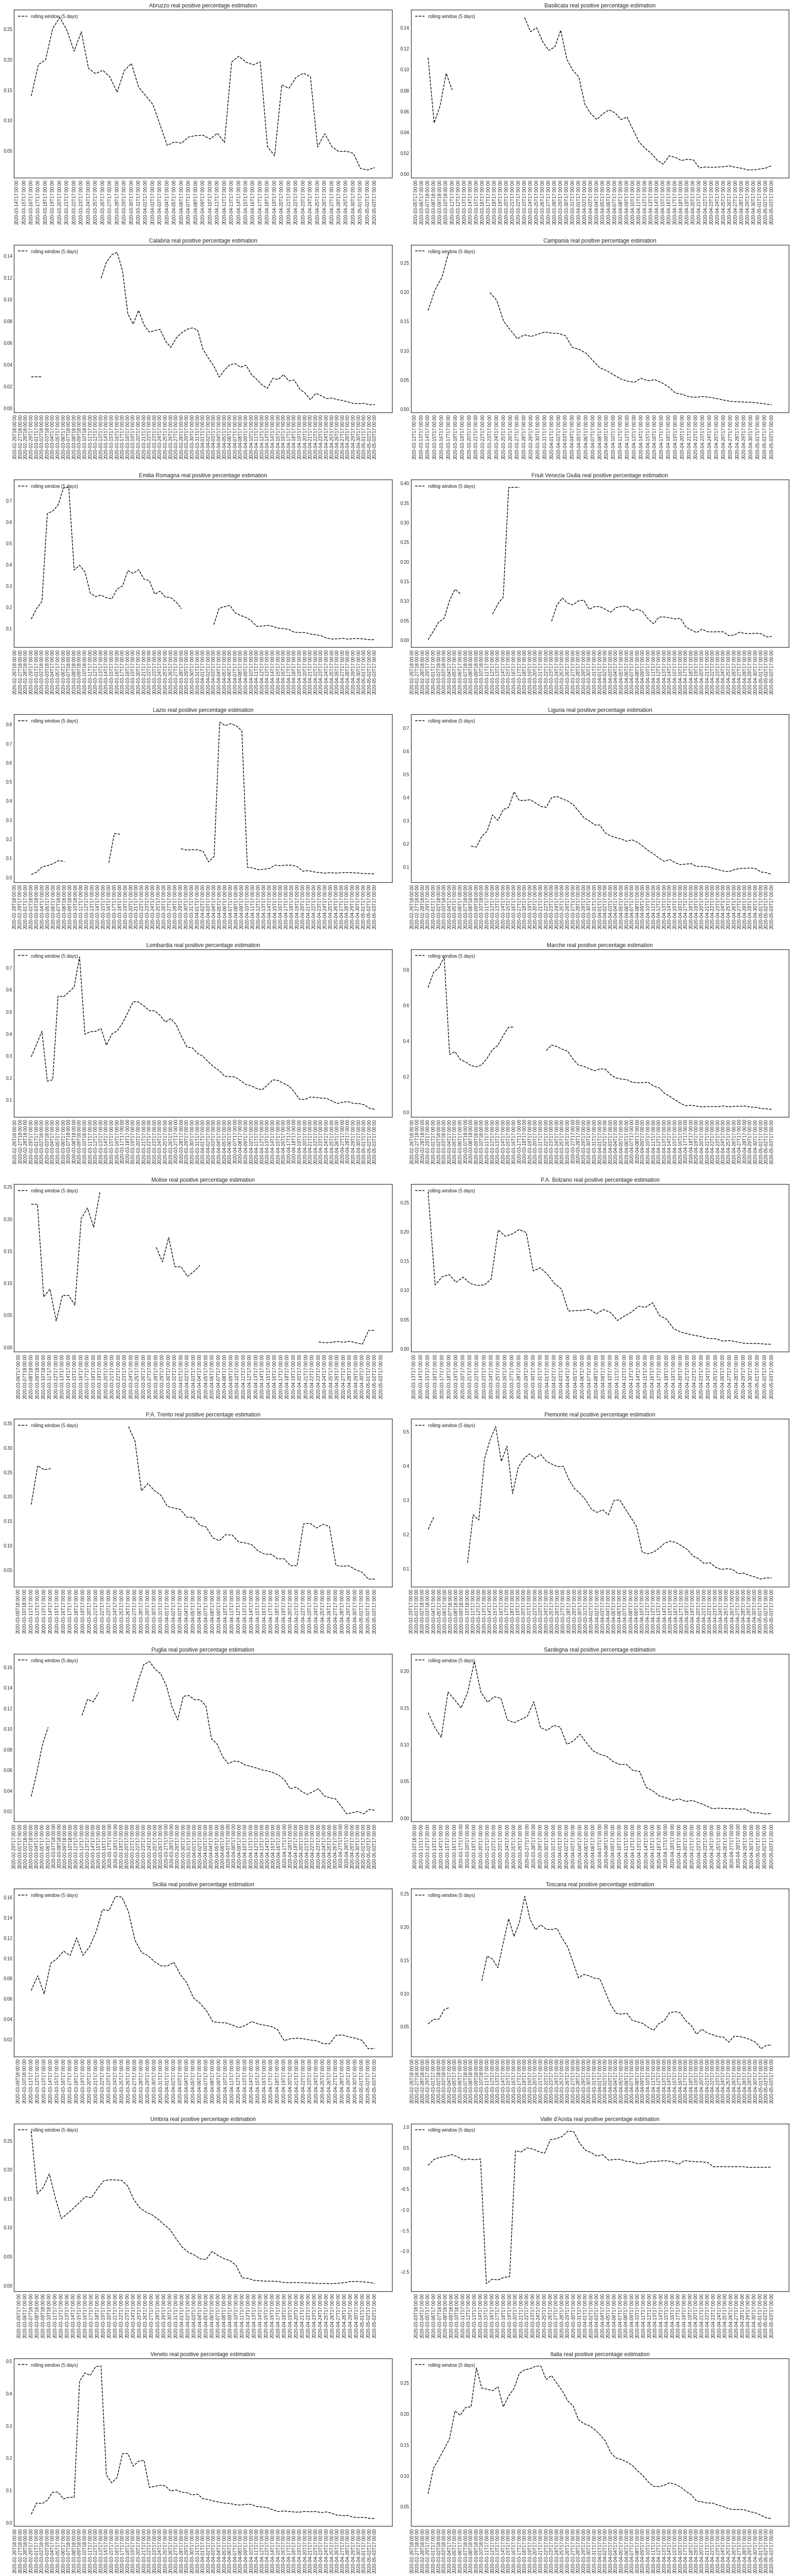

In [28]:
columns = list(italy_tested)
i=1
#first_interesting = 0
f = plt.figure(figsize=(30,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
for region in columns: 
    ax = f.add_subplot(11, 2, i)
    region_positive_vs_tested = italy_positive_vs_tested[[region]]
    #region_positive_vs_tested = region_positive_vs_tested[first_interesting:]
    region_positive_vs_tested.columns = ['tested']
    #region_positive_vs_tested = region_positive_vs_tested[first_interesting:]
    #ax.plot(region_positive_vs_tested.index, region_positive_vs_tested['tested'], '-r', label='daily')
    ax.plot(region_positive_vs_tested.index, region_positive_vs_tested['tested'].rolling(window=5).mean(), '--k', label='rolling window (5 days)')
    ax.set_title(region + ' real positive percentage estimation')
    ax.set_xticklabels(region_positive_vs_tested.index,rotation=90)
    plt.legend(loc="upper left", prop={'size': 10})
    i=i+1

Diamo anche un'occhiata all'andamento dei test

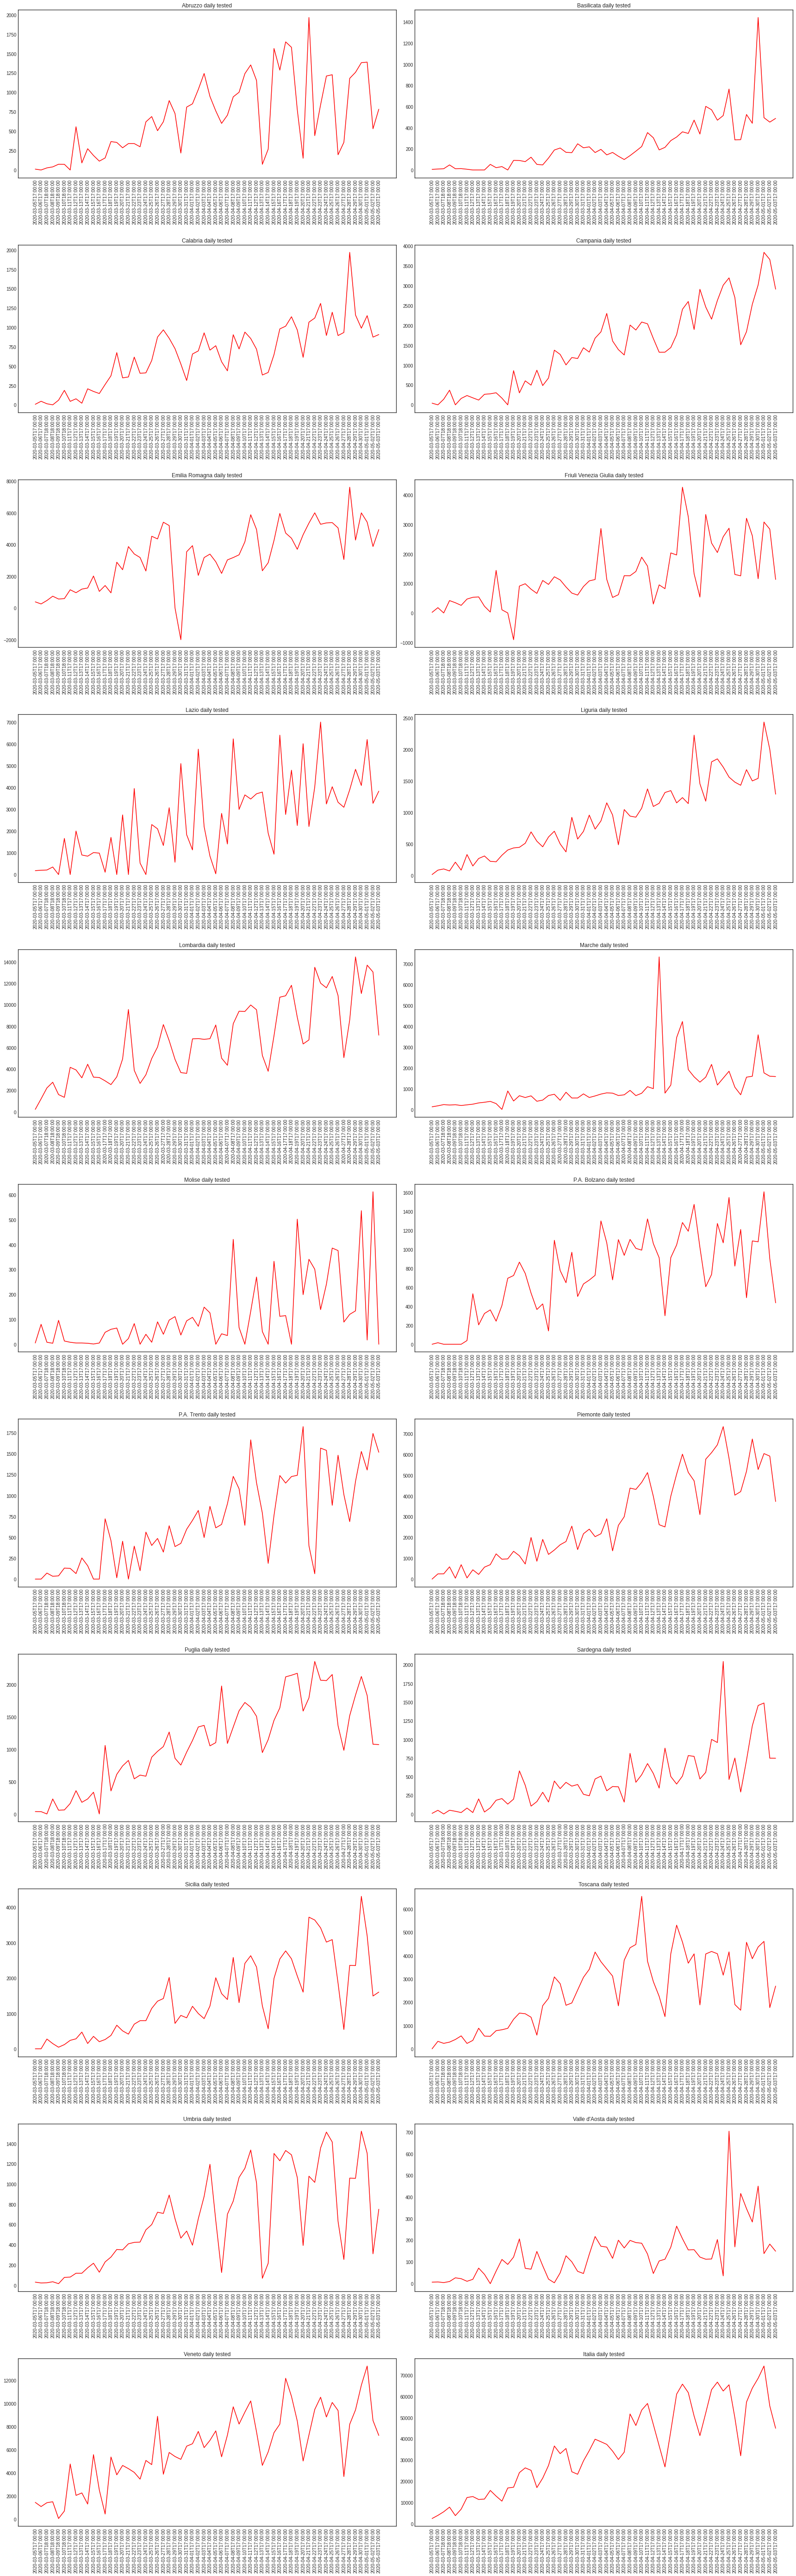

In [30]:
columns = list(italy_tested)
i=1
f = plt.figure(figsize=(30,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
for region in columns: 
    ax = f.add_subplot(11, 2, i)
    region_daily_tested = italy_tested[[region]].diff()
    region_daily_tested.columns = ['tested']
    region_daily_tested = region_daily_tested[10:]
    ax.plot(region_daily_tested.index, region_daily_tested['tested'], '-r', label='daily')
    ax.set_title(region + ' daily tested')
    ax.set_xticklabels(region_daily_tested.index,rotation=90)
    i=i+1


Il numero di test è determinante nel far salire o scendere il numero assoluto di contagi registrati. Tendenzialmente il numero di test eseguiti al giorno  sale ma in modo oscillatorio.

Vediamo infine la relazione tra positivi relativi (ossia rapportato al numero di test), ospedalizzati e deceduti

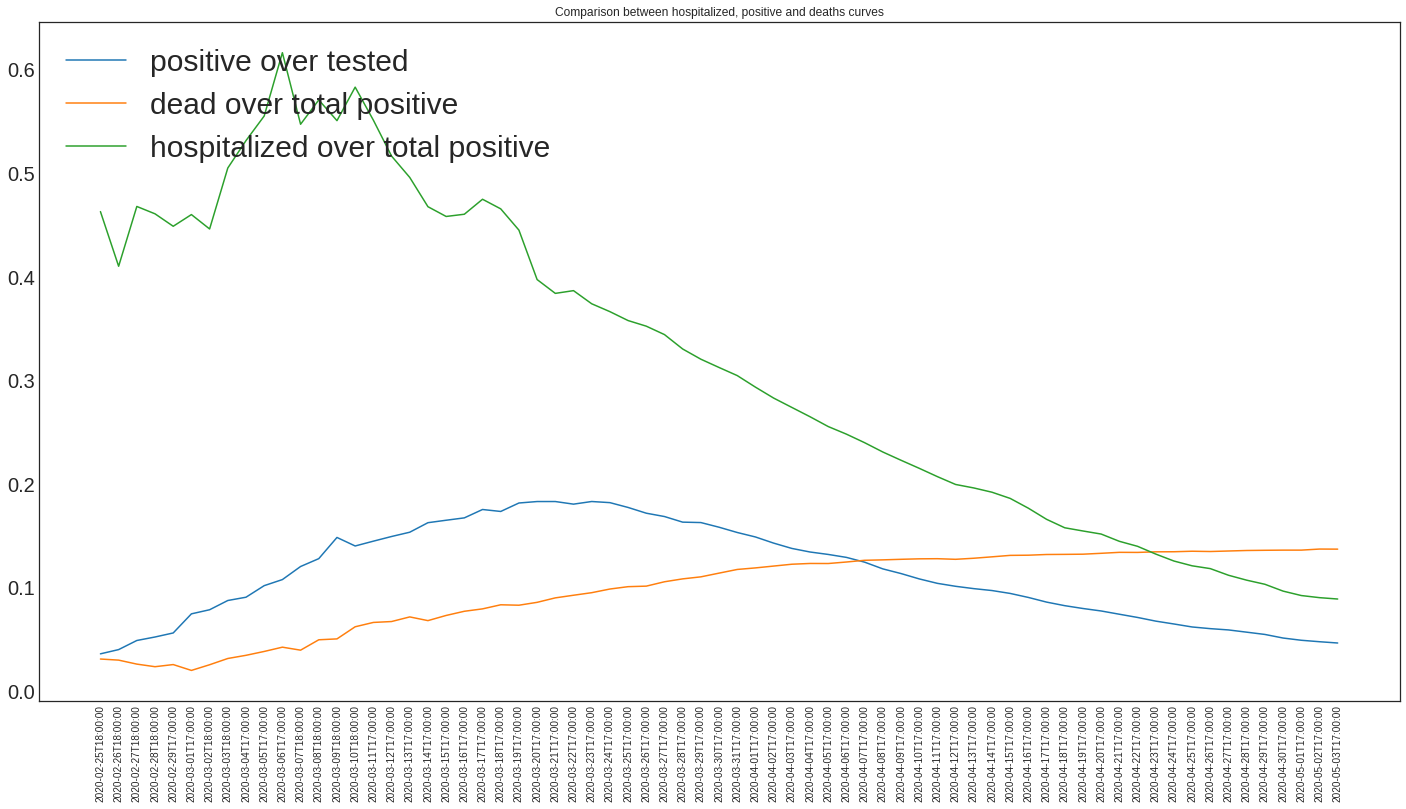

In [31]:
style = dict(size=20, color='gray')
columns = list(italy_tested)
last_day = covid['date'].max()
first_interesting = 1
f = plt.figure(figsize=(50,30))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
italy_positive_vs_tested = italy_currently_positive[['Italia']]/italy_tested[['Italia']]
italy_positive_vs_tested = italy_positive_vs_tested[first_interesting:]
italy_dead_vs_totalpositives = italy_dead[['Italia']]/italy_total_positive[['Italia']]
italy_dead_vs_totalpositives = italy_dead_vs_totalpositives[first_interesting:]
italy_hospitalized_vs_totalpositives = italy_hospitalized[['Italia']]/italy_total_positive[['Italia']]
italy_hospitalized_vs_totalpositives = italy_hospitalized_vs_totalpositives[first_interesting:]
ax.plot(italy_positive_vs_tested.index, italy_positive_vs_tested, label='positive over tested')
ax.plot(italy_dead_vs_totalpositives.index, italy_dead_vs_totalpositives, label='dead over total positive')
ax.plot(italy_hospitalized_vs_totalpositives.index, italy_hospitalized_vs_totalpositives, label='hospitalized over total positive')
#ax.text(italy_new_positive.shape[0]-first_interesting-1, region_positive_vs_tested.rolling(window=5).mean().loc[last_day], region, **style)

ax.set_title('Comparison between hospitalized, positive and deaths curves')
ax.set_xticklabels(italy_dead_vs_totalpositives.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('linear')
plt.legend(loc="upper left", prop={'size': 30})

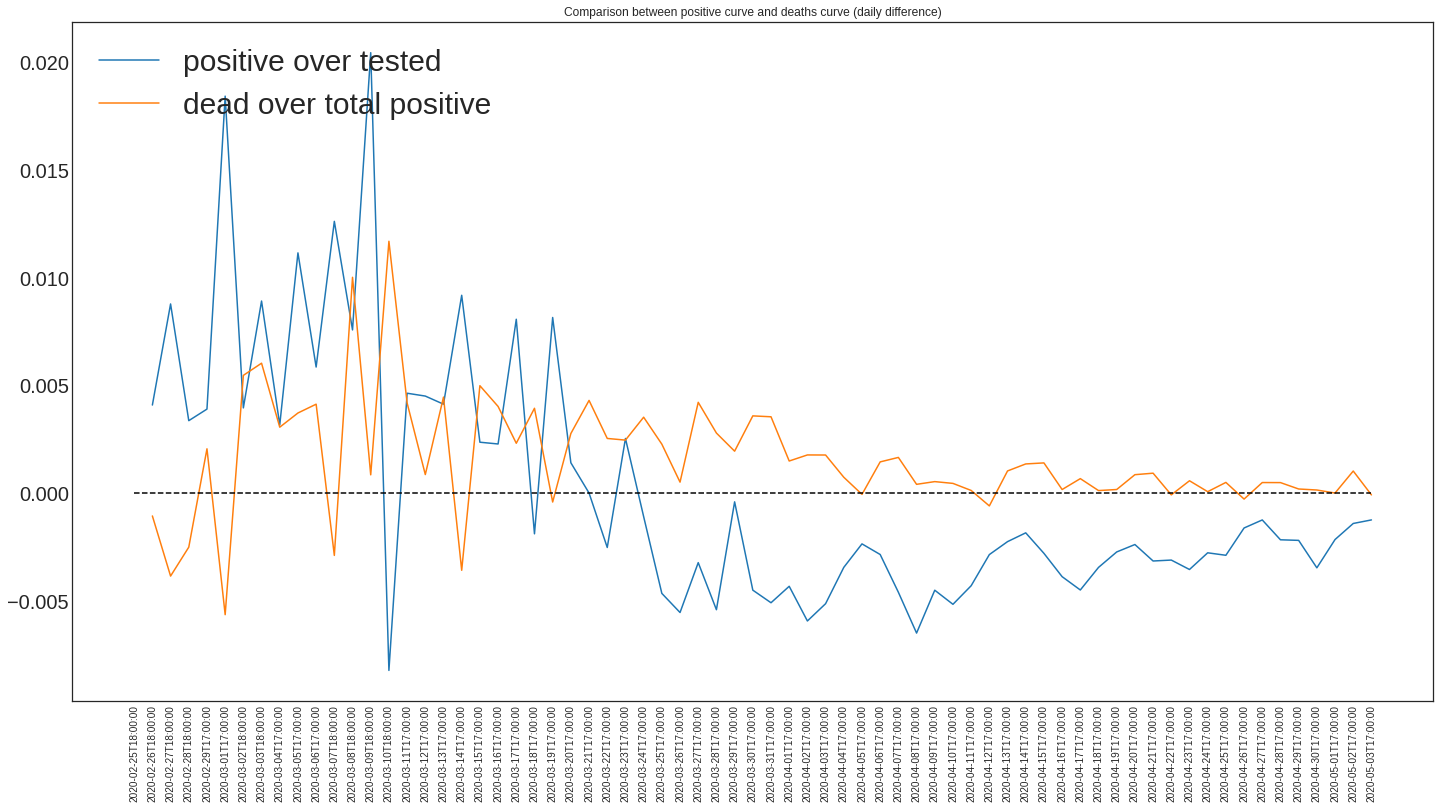

In [32]:
style = dict(size=20, color='gray')
columns = list(italy_tested)
last_day = covid['date'].max()
first_interesting = 1
f = plt.figure(figsize=(50,30))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
italy_positive_vs_tested = italy_currently_positive[['Italia']]/italy_tested[['Italia']]
italy_positive_vs_tested = italy_positive_vs_tested[first_interesting:]
italy_dead_vs_totalpositives = italy_dead[['Italia']]/italy_total_positive[['Italia']]
italy_dead_vs_totalpositives = italy_dead_vs_totalpositives[first_interesting:]
ax.plot(italy_positive_vs_tested.index, italy_positive_vs_tested.diff(), label='positive over tested')
ax.plot(italy_dead_vs_totalpositives.index, italy_dead_vs_totalpositives.diff(), label='dead over total positive')
ax.plot(italy_dead_vs_totalpositives.index, np.zeros(italy_dead_vs_totalpositives.index.size), '--k')

ax.set_title('Comparison between positive curve and deaths curve (daily difference)')
ax.set_xticklabels(italy_dead_vs_totalpositives.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('linear')
plt.legend(loc="upper left", prop={'size': 30})

La curva dei deceduti è per logica in ritardo rispetto al tasso di positivi.
La derivata dei positivi ha sfondato quota zero il 24/3, quella dei nuovi deceduti non ha ancora sfondato quota 0. Un ritardo di 40 giorni decisamente anomalo... probabilmente a causa della confusione nel calcolo dei deceduti, sia sui criteri, sia sui tempi
